
# Rotating Machine Fault Classification - Exploratory Data Analysis
## Following Course Methodology

### Passo 1 - Carregar Dados
Carregar dados de sinais elétricos e vibração de máquinas rotativas

Verificar valores, tipos e estrutura dos dados

Verificar dados faltantes e balanceamento das classes

TODO:

comentar os graficos 

escolher os atributos que fazem mais sentidos

ver se a corelacoes fazem sentido

filttrar/normalizar se necessario

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
df = pd.read_csv('Dataset APS1_Sinais Eletricos e Vibracao_csv.xls')


In [162]:
df.head()


,tempo_s,tipo_setup,I_entrada_A,P_entrada_W,I_saida_A,DesvPad_I_entrada_A,DesvPad _P_entrada_W,DesvPad _I_saida_A,Amp_I_entrada_A,Amp_P_entrada_W,Amp_I_saida_A,Kurtosis_I_entrada_A,Kurtosis_P_entrada_W,Kurtosis_I_saida_A,Mag_S1_f1_dBrms,Mag_S1_f2_dBrms,Mag_S1_f3_dBrms,Mag_S2_f1_dBrms,Mag_S2_f2_dBrms,Mag_S2_f3_dBrms
0,0.00,0.0,0.44905,63.67320,1.43660,0.042740,21.869566,0.113479,0.175,91.738,0.406,12.474475,15.435837,4.223108,-50.647991,-63.189443,-47.864704,-59.629807,-73.010381,-49.583755
1,0.08,0.0,0.44610,69.40320,1.67860,0.048945,1.600020,0.854342,0.227,7.359,3.843,20.070610,13.335535,16.966677,-50.696943,-63.340003,-48.313132,-59.591150,-72.360239,-49.473893
2,0.16,0.0,0.45175,69.11385,1.39950,0.042337,5.220348,0.284000,0.207,24.185,1.395,19.087723,7.345771,11.032327,-47.724322,-62.837371,-48.384219,-55.194912,-63.127903,-48.083630
3,0.24,0.0,0.43510,68.85665,1.39705,0.063224,3.437546,0.219507,0.228,16.040,0.973,6.869051,19.849528,9.136137,-47.652608,-62.613368,-48.768793,-55.275822,-63.310116,-47.937933
4,0.32,0.0,0.45055,70.52860,1.43375,0.048497,1.240032,0.111967,0.222,4.394,0.425,20.205840,2.325535,2.818658,-47.019446,-61.314274,-49.016646,-54.665312,-60.825200,-47.886619


In [163]:
print(f"Shape: {df.shape}")
print(f"Número de amostras: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")


Shape: (2505, 20)
Número de amostras: 2505
Número de colunas: 20


In [164]:
missing_values = df.isnull().sum()
print("Valores faltantes por coluna:")
print(missing_values)
if missing_values.sum() == 0:
    print("✓ Não há valores faltantes no dataset!")


Valores faltantes por coluna:
tempo_s                 0
tipo_setup              0
I_entrada_A             0
P_entrada_W             0
I_saida_A               0
DesvPad_I_entrada_A     0
DesvPad _P_entrada_W    0
DesvPad _I_saida_A      0
Amp_I_entrada_A         0
Amp_P_entrada_W         0
Amp_I_saida_A           0
Kurtosis_I_entrada_A    0
Kurtosis_P_entrada_W    0
Kurtosis_I_saida_A      0
Mag_S1_f1_dBrms         0
Mag_S1_f2_dBrms         0
Mag_S1_f3_dBrms         0
Mag_S2_f1_dBrms         0
Mag_S2_f2_dBrms         0
Mag_S2_f3_dBrms         0
dtype: int64
✓ Não há valores faltantes no dataset!


In [165]:
class_counts = df['tipo_setup'].value_counts().sort_index()
print("Distribuição das classes:")
for class_id, count in class_counts.items():
    print(f"  Classe {int(class_id)}: {count} amostras ({count/len(df)*100:.1f}%)")

# Verificar se o dataset está balanceado
is_balanced = len(class_counts.unique()) == 1
print(f"Dataset balanceado: {'✓ Sim' if is_balanced else '✗ Não'}")


Distribuição das classes:
  Classe 0: 501 amostras (20.0%)
  Classe 1: 501 amostras (20.0%)
  Classe 2: 501 amostras (20.0%)
  Classe 3: 501 amostras (20.0%)
  Classe 4: 501 amostras (20.0%)
Dataset balanceado: ✓ Sim


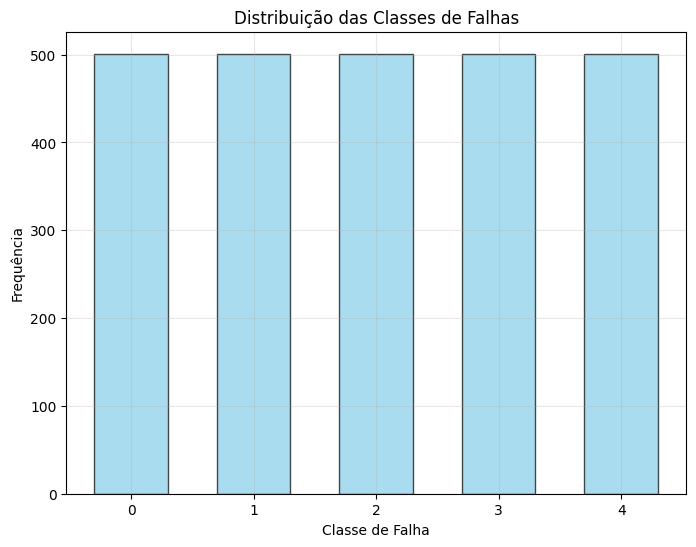

In [166]:
plt.figure(figsize=(8, 6))
class_counts = df['tipo_setup'].value_counts().sort_index()
plt.bar(class_counts.index, class_counts.values, alpha=0.7, color='skyblue', 
        edgecolor='black', width=0.6)
plt.title('Distribuição das Classes de Falhas')
plt.xlabel('Classe de Falha')
plt.ylabel('Frequência')
plt.xticks([0, 1, 2, 3, 4])
plt.grid(True, alpha=0.3)
plt.show()

In [167]:
df.head(10)

,tempo_s,tipo_setup,I_entrada_A,P_entrada_W,I_saida_A,DesvPad_I_entrada_A,DesvPad _P_entrada_W,DesvPad _I_saida_A,Amp_I_entrada_A,Amp_P_entrada_W,Amp_I_saida_A,Kurtosis_I_entrada_A,Kurtosis_P_entrada_W,Kurtosis_I_saida_A,Mag_S1_f1_dBrms,Mag_S1_f2_dBrms,Mag_S1_f3_dBrms,Mag_S2_f1_dBrms,Mag_S2_f2_dBrms,Mag_S2_f3_dBrms
0,0.00,0.0,0.44905,63.67320,1.43660,0.042740,21.869566,0.113479,0.175,91.738,0.406,12.474475,15.435837,4.223108,-50.647991,-63.189443,-47.864704,-59.629807,-73.010381,-49.583755
1,0.08,0.0,0.44610,69.40320,1.67860,0.048945,1.600020,0.854342,0.227,7.359,3.843,20.070610,13.335535,16.966677,-50.696943,-63.340003,-48.313132,-59.591150,-72.360239,-49.473893
2,0.16,0.0,0.45175,69.11385,1.39950,0.042337,5.220348,0.284000,0.207,24.185,1.395,19.087723,7.345771,11.032327,-47.724322,-62.837371,-48.384219,-55.194912,-63.127903,-48.083630
3,0.24,0.0,0.43510,68.85665,1.39705,0.063224,3.437546,0.219507,0.228,16.040,0.973,6.869051,19.849528,9.136137,-47.652608,-62.613368,-48.768793,-55.275822,-63.310116,-47.937933
4,0.32,0.0,0.45055,70.52860,1.43375,0.048497,1.240032,0.111967,0.222,4.394,0.425,20.205840,2.325535,2.818658,-47.019446,-61.314274,-49.016646,-54.665312,-60.825200,-47.886619
5,0.40,0.0,0.45780,72.12370,1.64435,0.049214,1.037477,0.727560,0.268,3.965,2.901,19.733265,4.201291,10.761748,-45.442220,-55.648148,-48.120426,-53.857686,-54.091117,-47.796733
6,0.48,0.0,0.45665,67.13660,1.56650,0.031887,12.565748,0.823614,0.135,57.515,3.872,9.631977,21.907203,21.479692,-45.488704,-56.009613,-48.238176,-54.170722,-54.533745,-47.558322
7,0.56,0.0,0.46855,68.28150,1.42010,0.139621,5.431692,0.129738,0.741,26.435,0.424,10.827122,21.559988,3.354328,-45.695884,-56.248508,-48.605394,-54.524769,-54.941720,-47.285231
8,0.64,0.0,0.46805,70.12305,1.46285,0.051746,0.543396,0.212010,0.295,1.893,1.008,12.100309,2.229543,10.067876,-45.816182,-56.544124,-48.907357,-54.935360,-55.395529,-47.511850
9,0.72,0.0,0.45150,70.46765,1.85890,0.050280,0.995491,1.263191,0.217,3.965,4.183,11.533168,4.174269,8.071069,-45.966467,-56.952812,-49.355602,-55.346473,-55.839678,-47.592548


In [168]:
df.tail(10)

,tempo_s,tipo_setup,I_entrada_A,P_entrada_W,I_saida_A,DesvPad_I_entrada_A,DesvPad _P_entrada_W,DesvPad _I_saida_A,Amp_I_entrada_A,Amp_P_entrada_W,Amp_I_saida_A,Kurtosis_I_entrada_A,Kurtosis_P_entrada_W,Kurtosis_I_saida_A,Mag_S1_f1_dBrms,Mag_S1_f2_dBrms,Mag_S1_f3_dBrms,Mag_S2_f1_dBrms,Mag_S2_f2_dBrms,Mag_S2_f3_dBrms
2495,39.28,4.0,0.45310,72.93975,1.41230,0.139288,4.642627,0.548626,0.731,21.542,2.783,11.927464,22.161540,18.918135,-32.601970,-54.171586,-42.211742,-37.882920,-48.411716,-41.647851
2496,39.36,4.0,0.45685,69.45855,1.42105,0.067191,8.440546,0.130558,0.347,36.402,0.551,6.968719,15.816190,7.570950,-32.624414,-53.643372,-41.487348,-37.754360,-48.333979,-41.806994
2497,39.44,4.0,0.44580,64.83420,1.41890,0.060788,15.296240,0.140316,0.196,68.697,0.538,6.191738,19.594616,2.884057,-32.723686,-53.185541,-41.059078,-37.699228,-48.171282,-41.681567
2498,39.52,4.0,0.46650,69.04955,1.63010,0.027117,1.540961,0.691242,0.129,6.788,3.061,21.648562,5.433971,14.220737,-32.861428,-52.800685,-41.006217,-37.703468,-48.421369,-42.018882
2499,39.60,4.0,0.46400,72.07715,1.56470,0.064213,14.766315,0.912505,0.308,89.024,4.502,6.509324,11.631509,21.072072,-33.035220,-52.381092,-41.237712,-37.771560,-48.852786,-42.217862
2500,39.68,4.0,0.46575,68.42795,1.59235,0.042147,8.058820,0.900427,0.199,37.403,4.276,5.486469,22.266532,21.582764,-33.195195,-52.502279,-41.610532,-37.874381,-49.147213,-42.417970
2501,39.76,4.0,0.44705,62.32815,1.57365,0.068987,15.876663,0.904702,0.231,62.159,4.218,5.237910,11.518238,21.593782,-33.360763,-52.868492,-42.054637,-37.995903,-49.251871,-42.703237
2502,39.84,4.0,0.47110,76.04075,1.77275,0.045194,34.799709,1.657858,0.191,184.906,7.810,9.874863,20.660427,6.075266,-33.497896,-53.300911,-42.289221,-38.129107,-48.947030,-42.896321
2503,39.92,4.0,0.47745,72.86850,1.39700,0.043033,0.826486,0.131019,0.194,2.893,0.383,21.320253,2.327027,1.904577,-33.581380,-53.601503,-42.527074,-38.258422,-48.618126,-42.420583
2504,40.00,4.0,0.48705,70.70715,1.51215,0.114987,12.366981,0.514260,0.608,41.761,2.476,10.119385,6.899001,20.098625,-33.599577,-53.697702,-42.686179,-38.335583,-48.344164,-41.969820


In [169]:
feature_columns = [col for col in df.columns if col not in ['tempo_s', 'tipo_setup']]
df[feature_columns].describe()


,I_entrada_A,P_entrada_W,I_saida_A,DesvPad_I_entrada_A,DesvPad _P_entrada_W,DesvPad _I_saida_A,Amp_I_entrada_A,Amp_P_entrada_W,Amp_I_saida_A,Kurtosis_I_entrada_A,Kurtosis_P_entrada_W,Kurtosis_I_saida_A,Mag_S1_f1_dBrms,Mag_S1_f2_dBrms,Mag_S1_f3_dBrms,Mag_S2_f1_dBrms,Mag_S2_f2_dBrms,Mag_S2_f3_dBrms
count,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000
mean,0.467173,71.095485,1.510273,0.062549,10.030840,0.495564,0.280475,46.371912,2.225988,12.050777,14.937885,11.168255,-39.983011,-54.772230,-47.535366,-45.145129,-55.583079,-46.578764
std,0.037798,6.369966,0.138248,0.057536,11.105669,0.375317,0.269268,52.036291,1.767510,5.230828,6.931692,7.207961,4.949400,9.313107,5.857693,6.269441,9.072283,3.855181
min,0.261900,38.470250,0.810650,0.001372,0.543396,0.063909,0.005000,1.893000,0.244000,1.660392,1.325033,1.187931,-50.696943,-71.520216,-58.985078,-65.271484,-73.010381,-54.985263
25%,0.445700,67.307950,1.419950,0.041017,2.689081,0.154070,0.183000,12.789000,0.596000,7.971048,9.554414,4.030760,-43.902336,-59.541521,-52.053099,-50.245276,-63.067057,-49.493122
50%,0.456750,69.612150,1.479250,0.056569,8.407893,0.377251,0.244000,38.618000,1.745000,10.701860,16.355427,9.754281,-41.943547,-54.967319,-47.868026,-48.353184,-59.158229,-47.233461
75%,0.472450,73.029150,1.590750,0.070714,12.983316,0.879553,0.302000,58.301000,4.108000,15.927991,21.599938,18.540216,-34.647596,-50.619857,-41.947513,-37.978948,-49.267334,-42.830915
max,0.625950,96.651550,2.118200,0.860274,149.491667,2.007972,3.881000,672.213000,10.687000,22.979158,22.994930,22.794465,-31.993773,-37.605394,-36.684861,-35.173001,-37.765710,-38.495491


### Passo 2 - Exploração e Visualização
Exploração e visualização dos dados multidimensionais


In [170]:
import seaborn as sns

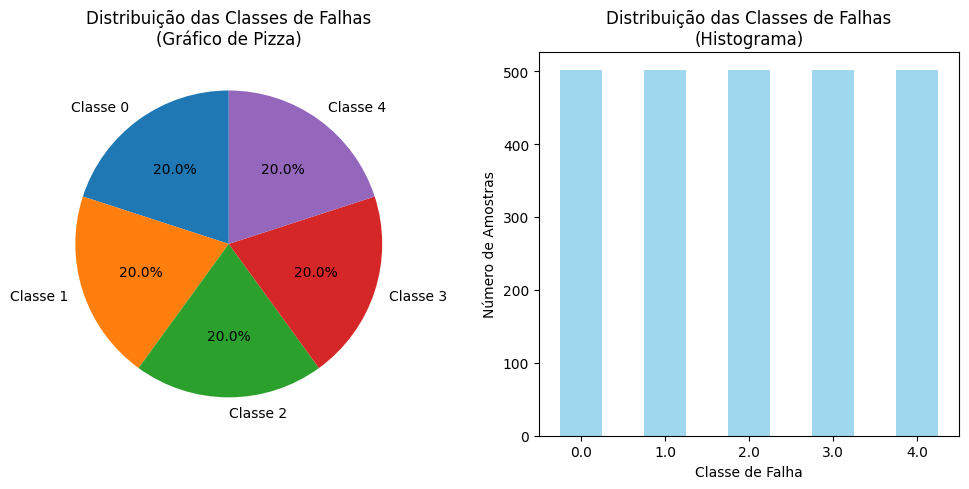

In [171]:
# 1. Gráfico de pizza das classes
class_distribution = df['tipo_setup'].value_counts().sort_index()

plt.figure(figsize=(10, 5))

# Subplot 1: Gráfico de pizza
plt.subplot(1, 2, 1)
plt.pie(class_distribution, labels=[f'Classe {int(i)}' for i in class_distribution.index], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Classes de Falhas\n(Gráfico de Pizza)')

# Subplot 2: Histograma
plt.subplot(1, 2, 2)
class_distribution.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Distribuição das Classes de Falhas\n(Histograma)')
plt.xlabel('Classe de Falha')
plt.ylabel('Número de Amostras')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### O que o gráfico mostra
- Cada barra representa uma classe de falha (0 a 4).
- As frequências são praticamente iguais (cerca de 500 amostras por classe).

### Insight principal
- O dataset está **balanceado** entre todas as classes
- Isso é positivo, pois **evita viés do modelo** em favor das classes mais frequentes.
- Assim, podemos usar métricas padrão de classificação (accuracy, F1-score) sem precisar corrigir desbalanceamento (ex.: oversampling, undersampling, class weights).

### Implicações para o modelo
- O treinamento não precisará de técnicas de reamostragem.
- A avaliação será **mais justa e representativa** para todas as classes, já que nenhuma delas domina.
- Isso também reforça que usar **macro-F1** é adequado, porque todas as classes têm o mesmo peso de importância e estão igualmente representadas.

### Conclusão
O gráfico confirma que o dataset foi construído de forma **experimentalmente equilibrada**, o que facilita a análise e aumenta a confiabilidade dos resuldados do classificador.

In [172]:
# 2. Estatísticas descritivas individuais para algumas características importantes
# Selecionar características mais importantes baseadas no conhecimento do domínio
important_features = [
    'I_entrada_A',           # Corrente de entrada
    'P_entrada_W',           # Potência de entrada  
    'I_saida_A',             # Corrente de saída
    'Mag_S1_f1_dBrms',       # Magnitude sensor 1, freq 1
    'Mag_S2_f1_dBrms'        # Magnitude sensor 2, freq 1
]

for feature in important_features:
    print(f"\n--- {feature} ---")
    print(f"Média: {df[feature].mean():.4f}")
    print(f"Mediana: {df[feature].median():.4f}")
    print(f"Desvio-padrão: {df[feature].std():.4f}")
    print(f"Variância: {df[feature].var():.4f}")
    print(f"Obliquidade (Skewness): {df[feature].skew():.4f}")
    print(f"Curtose (Kurtosis): {df[feature].kurtosis():.4f}")



--- I_entrada_A ---
Média: 0.4672
Mediana: 0.4567
Desvio-padrão: 0.0378
Variância: 0.0014
Obliquidade (Skewness): 1.0416
Curtose (Kurtosis): 2.1548

--- P_entrada_W ---
Média: 71.0955
Mediana: 69.6121
Desvio-padrão: 6.3700
Variância: 40.5765
Obliquidade (Skewness): 0.8265
Curtose (Kurtosis): 1.3957

--- I_saida_A ---
Média: 1.5103
Mediana: 1.4792
Desvio-padrão: 0.1382
Variância: 0.0191
Obliquidade (Skewness): 0.6522
Curtose (Kurtosis): 2.2895

--- Mag_S1_f1_dBrms ---
Média: -39.9830
Mediana: -41.9435
Desvio-padrão: 4.9494
Variância: 24.4966
Obliquidade (Skewness): 0.2375
Curtose (Kurtosis): -1.4428

--- Mag_S2_f1_dBrms ---
Média: -45.1451
Mediana: -48.3532
Desvio-padrão: 6.2694
Variância: 39.3059
Obliquidade (Skewness): 0.2637
Curtose (Kurtosis): -1.6358


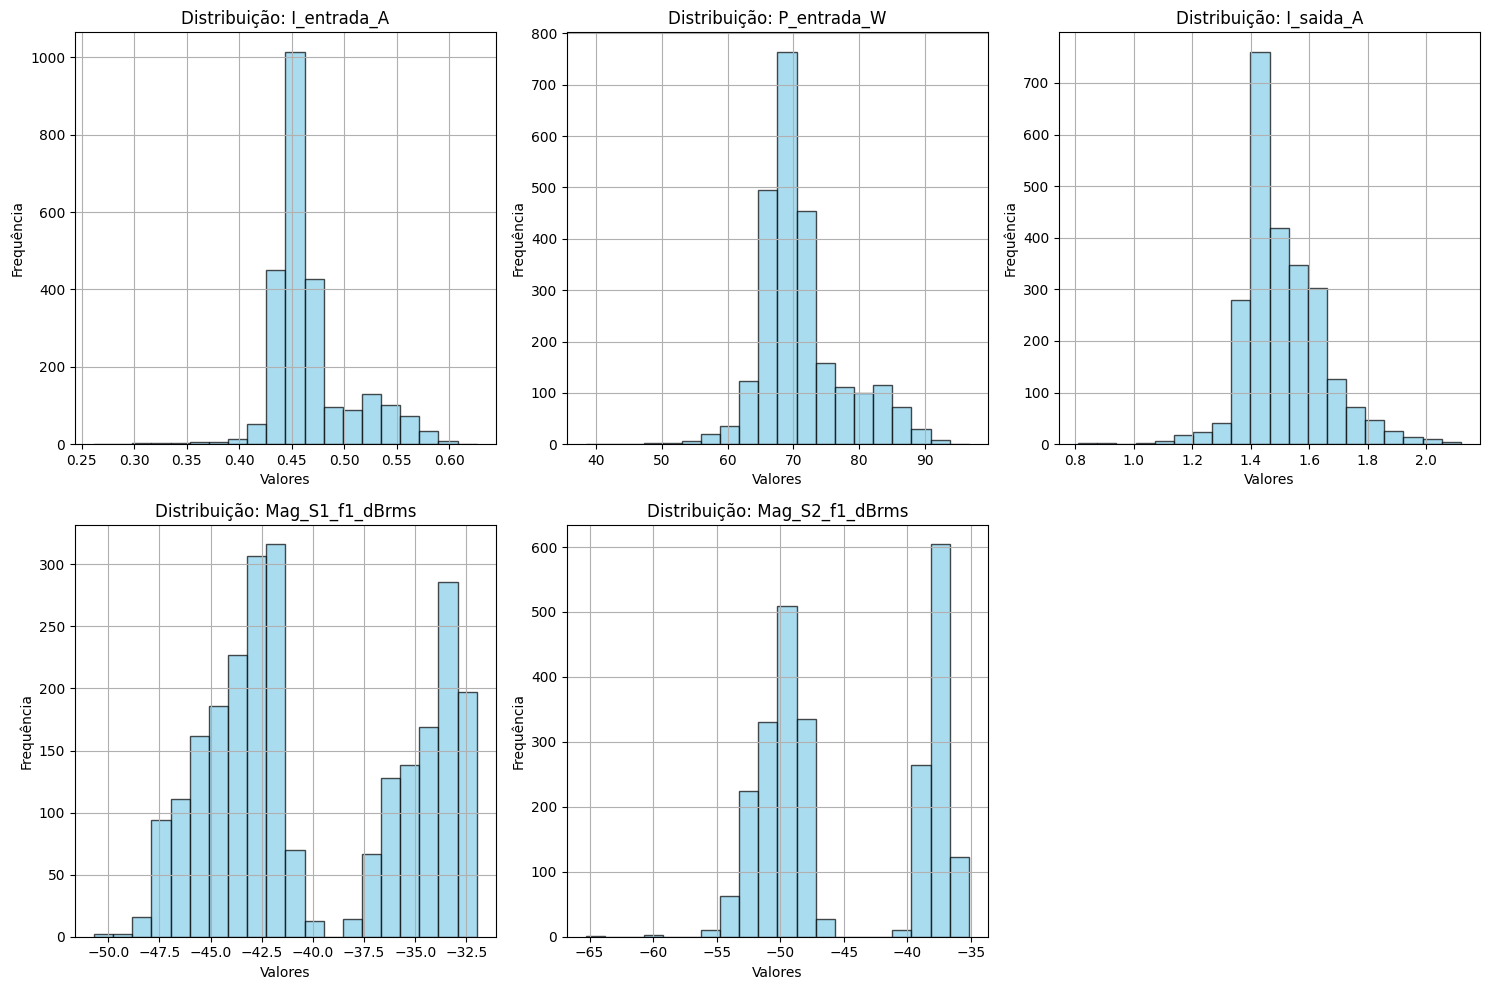

In [173]:
# 3. Histogramas para distribuição das características
plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i+1)
    df[feature].hist(bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição: {feature}')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


### Análise dos gráficos

### Elétricas (I_entrada_A, P_entrada_W, I_saída_A)

- Mostram distribuições concentradas (quase normais).
- **P_entrada_W** tem maior dispersão e é o melhor indicador de **sobrecarga**.
- **I_entrada_A** acompanha P_entrada, mas com menos variabilidade.
- **I_saída_A** apresenta distribuição normal, mas pouco poder discriminativo entre classes.

### Vibração (Mag_S1_f1, Mag_S2_f1)

- Ambas apresentam distribuições **bimodais**, refletindo grupos distintos de operação.
- Relacionam-se diretamente às falhas mecânicas (d**esbalanceado e desalinhado**).
- Como são fortemente correlacionadas, pode ser redundante manter as duas → seleção de atributos pode escolher apenas uma.

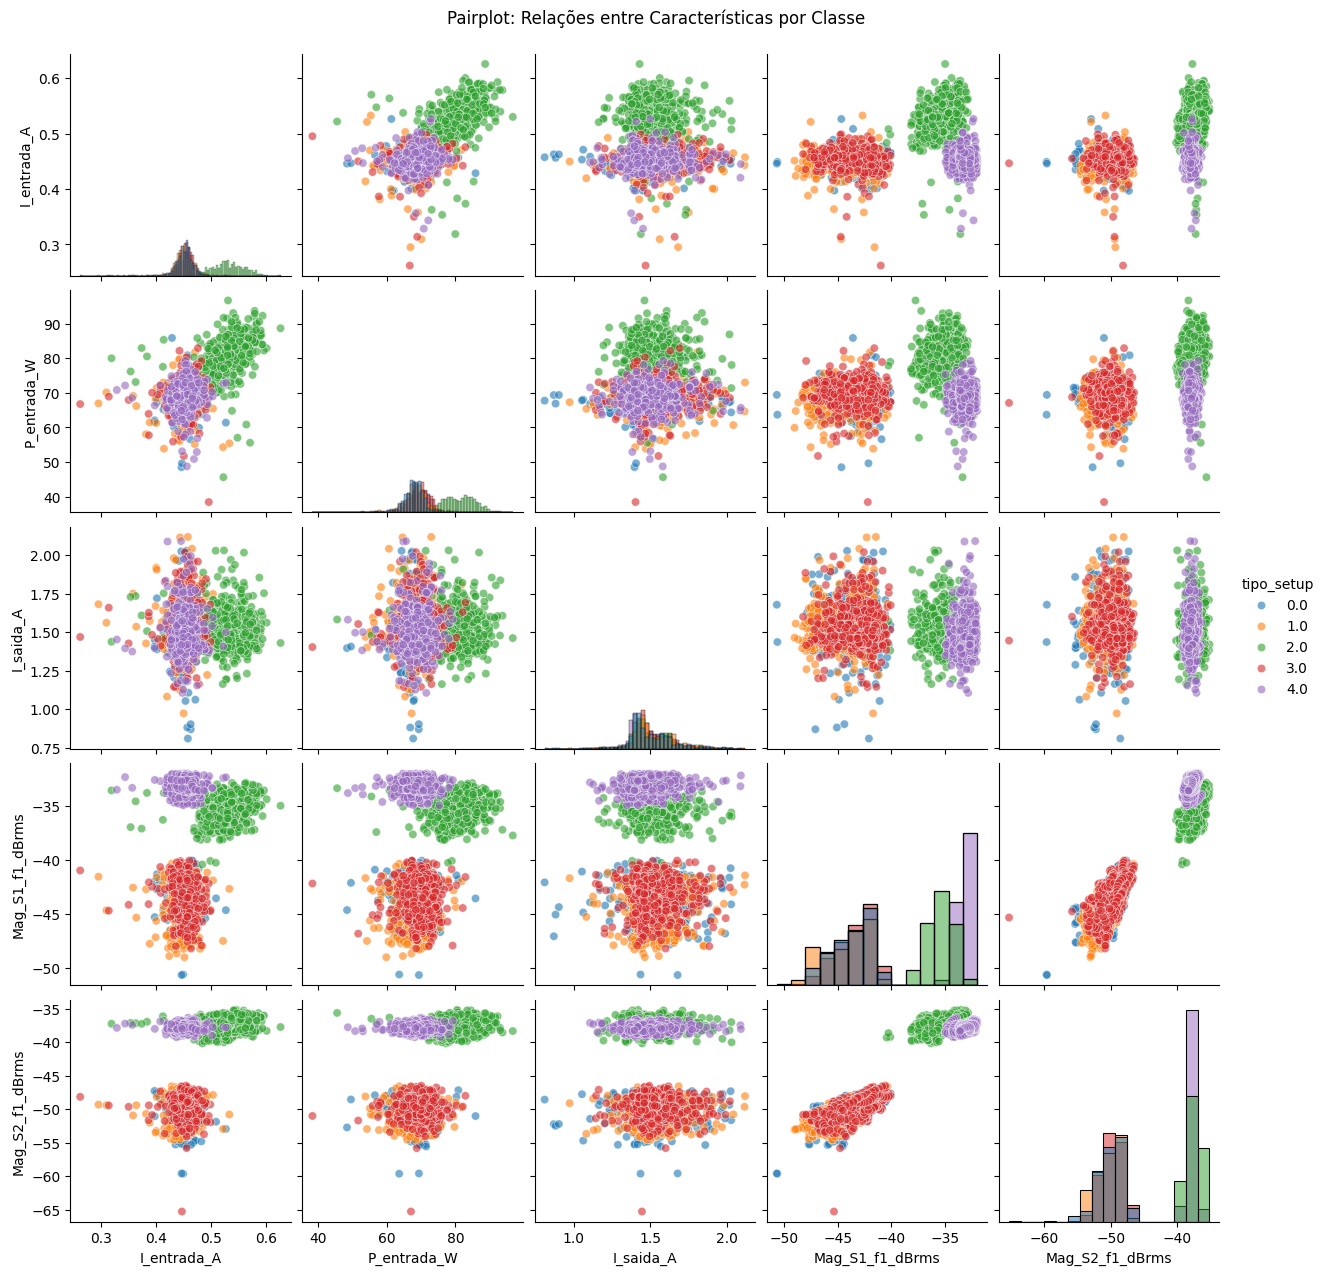

In [174]:
# 4. Pairplot (gráfico de pares) - versão simplificada com características selecionadas
# Criar dataframe com características selecionadas + classe
selected_features = important_features + ['tipo_setup']
df_selected = df[selected_features].copy()

# Converter tipo_setup para string para melhor visualização
df_selected['tipo_setup'] = df_selected['tipo_setup'].astype(str)

# Pairplot com matiz das classes
sns.pairplot(df_selected, hue='tipo_setup', diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: Relações entre Características por Classe', y=1.02)
plt.show()


### Comentários do Pairplot

### Separação por vibração
- As variáveis **Mag_S1_f1_dBrms** e **Mag_S2_f1_dBrms** apresentam os agrupamentos mais evidentes.
- As classes **3 (Desbalanceado)** e **4 (Desalinhado)** ficam bem destacadas, com clusters visíveis e pouco sobrepostos com as demais.
- Isso confirma que as medidas de vibração são os melhores atributos para **detecção de falhas mecânicas**.

### Sobrecarga (classe 2)
- Em **P_entrada_W**, observa-se que a classe 2 (vermelha) se concentra em valores mais altos, diferenciando-se das demais.
- Isso reforça que a potência elétrica é a principal variável para identificar **sobrecarga**.

### Corrente de saída

- **I_saida_A** mostra grande sobreposição entre classes, com pouca separação clara.
- Indica baixo poder discriminativo isolado, devendo ser avaliada em combinação com outros atributos.

### Relações cruzadas

- O cruzamento de **variáveis elétricas (I_entrada, P_entrada)** com **variáveis de vibração** mostra que as duas famílias de atributos são **complementares**:

    - Elétricas → ajudam na distinção de sobrecarga.

    - Vibração → separam falhas mecânicas.

- Essa complementaridade é positiva para o modelo, pois cobre diferentes tipos de falha.

In [175]:
# 5. Matriz de correlação
correlation_matrix = df[feature_columns].corr()
print("Matriz de correlação:")
correlation_matrix


Matriz de correlação:


,I_entrada_A,P_entrada_W,I_saida_A,DesvPad_I_entrada_A,DesvPad _P_entrada_W,DesvPad _I_saida_A,Amp_I_entrada_A,Amp_P_entrada_W,Amp_I_saida_A,Kurtosis_I_entrada_A,Kurtosis_P_entrada_W,Kurtosis_I_saida_A,Mag_S1_f1_dBrms,Mag_S1_f2_dBrms,Mag_S1_f3_dBrms,Mag_S2_f1_dBrms,Mag_S2_f2_dBrms,Mag_S2_f3_dBrms
I_entrada_A,1.000000,0.719286,-0.009146,-0.283939,0.027581,-0.000582,-0.234529,0.029099,0.000591,0.045065,-0.021274,0.001925,0.396516,0.657333,0.536371,0.512556,0.682278,0.484288
P_entrada_W,0.719286,1.000000,0.011448,-0.032126,-0.232482,0.004686,-0.030039,-0.197346,0.008355,-0.009965,-0.066356,0.012752,0.380039,0.621145,0.498193,0.482315,0.641204,0.452760
I_saida_A,-0.009146,0.011448,1.000000,0.035570,0.018817,0.608378,0.036167,0.020772,0.491845,0.022333,0.020482,0.298787,-0.068854,-0.037738,-0.056669,-0.057696,-0.041312,-0.060476
DesvPad_I_entrada_A,-0.283939,-0.032126,0.035570,1.000000,0.078424,-0.005509,0.982845,0.073503,-0.015266,0.128158,0.021183,-0.024591,-0.003263,0.014118,0.004396,0.001262,0.012457,-0.001320
DesvPad _P_entrada_W,0.027581,-0.232482,0.018817,0.078424,1.000000,-0.016855,0.070191,0.988617,-0.020780,-0.062415,0.367969,-0.000906,-0.005416,0.018336,0.012865,0.013335,0.016239,0.015576
DesvPad _I_saida_A,-0.000582,0.004686,0.608378,-0.005509,-0.016855,1.000000,0.000250,-0.013511,0.968639,0.048581,-0.008676,0.609174,0.004507,0.006813,0.004996,0.000810,-0.003024,-0.006234
Amp_I_entrada_A,-0.234529,-0.030039,0.036167,0.982845,0.070191,0.000250,1.000000,0.066135,-0.009154,0.205262,0.014474,-0.023768,-0.000307,0.016603,0.008646,0.004117,0.014768,0.003343
Amp_P_entrada_W,0.029099,-0.197346,0.020772,0.073503,0.988617,-0.013511,0.066135,1.000000,-0.016215,-0.056422,0.389564,0.003151,-0.004449,0.017108,0.011933,0.012875,0.014564,0.014131
Amp_I_saida_A,0.000591,0.008355,0.491845,-0.015266,-0.020780,0.968639,-0.009154,-0.016215,1.000000,0.047603,-0.013078,0.678888,0.005121,0.006827,0.004402,0.001714,-0.004928,-0.003931
Kurtosis_I_entrada_A,0.045065,-0.009965,0.022333,0.128158,-0.062415,0.048581,0.205262,-0.056422,0.047603,1.000000,-0.027411,-0.004877,0.007750,-0.002039,0.000960,0.009923,-0.009462,0.004733


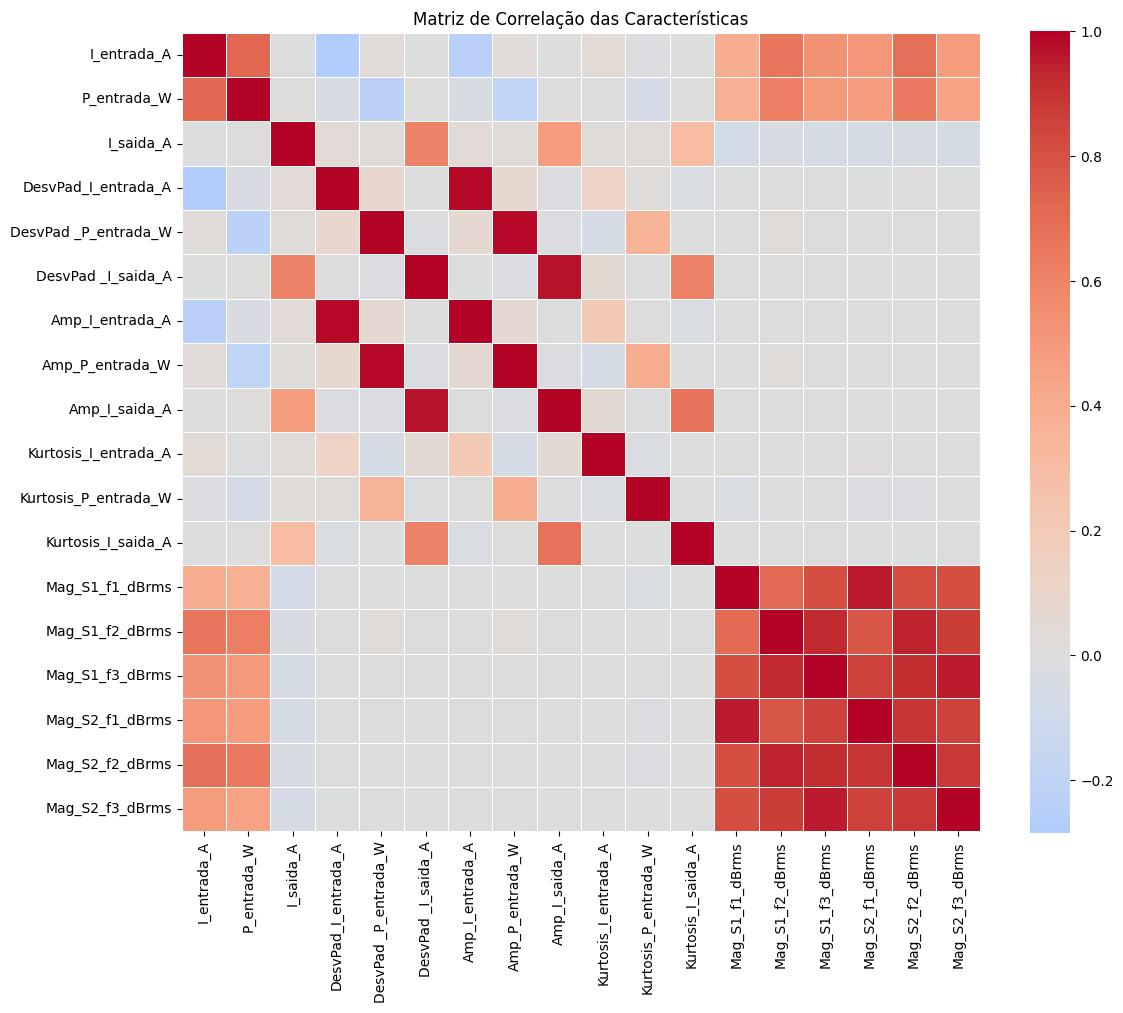

In [176]:
# 5.1. Heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlação das Características')
plt.tight_layout()
plt.show()


### Observa-se um forte grau de correlação em dois blocos principais:

- Grandezas elétricas e suas derivadas (corrente e potência).
- Grandezas de vibração (sensores e harmônicas).

### Variáveis altamente correlacionadas

- **I_entrada_A × P_entrada_W** → alta correlação, pois a potência de entrada depende diretamente da corrente de entrada.
- **Magnitudes de vibração (Mag_S1_f1, f2, f3 e Mag_S2_f1, f2, f3)** → correlação muito forte, chegando próxima de 1. Isso ocorre porque as três harmônicas de um mesmo sensor são derivadas da mesma série temporal de vibração, logo captam padrões similares.
- **Sensor 1 × Sensor 2** → também existe alta correlação entre harmônicas de sensores diferentes (ex.: Mag_S1_f1 × Mag_S2_f1), já que ambos medem vibração do mesmo sistema físico, apenas em pontos distintos.

### Por que a área inferior direita tem tanta correlação
- Essa região da matriz corresponde justamente às variáveis de vibração (harmônicas dos dois sensores).
- Como todas vêm da mesma fonte (acelerômetros que captam vibração), é esperado que os sinais apresentem forte redundância.
- Isso indica que manter todas as 6 variáveis pode ser desnecessário → podemos selecionar apenas as mais representativas para evitar multicolinearidade.

### Variáveis recomendadas para manter

**Elétricas**

- **P_entrada_W** → discriminador forte da Sobrecarga (classe 2).
- **I_entrada_A** → complementa P_entrada (também aumenta em sobrecarga, pode ajudar).
- **Kurtosis_P_entrada_W ou Amp_P_entrada_W** → escolher uma estatística derivada de potência para capturar variabilidade, mas não precisa manter todas (para evitar redundância).

**Vibração**

- **Mag_S1_f1_dBrms** → separa bem Desbalanceado (3) e Desalinhado (4).
- **Mag_S2_f1_dBrms** → muito correlacionado com S1, mas vale testar se melhora robustez; se precisarmos reduzir, manter só um sensor (S1).
- **Mag_S1_f2_dBrms** → segunda harmônica pode capturar padrões de desbalanceamento não visíveis na f1.

In [177]:
# Identificar correlações altas
print("Correlações altas (|r| > 0.8):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            feat1 = correlation_matrix.columns[i]
            feat2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feat1, feat2, corr_value))
            print(f"  {feat1} ↔ {feat2}: {corr_value:.3f}")


Correlações altas (|r| > 0.8):
  DesvPad_I_entrada_A ↔ Amp_I_entrada_A: 0.983
  DesvPad _P_entrada_W ↔ Amp_P_entrada_W: 0.989
  DesvPad _I_saida_A ↔ Amp_I_saida_A: 0.969
  Mag_S1_f1_dBrms ↔ Mag_S1_f3_dBrms: 0.815
  Mag_S1_f1_dBrms ↔ Mag_S2_f1_dBrms: 0.955
  Mag_S1_f1_dBrms ↔ Mag_S2_f2_dBrms: 0.813
  Mag_S1_f1_dBrms ↔ Mag_S2_f3_dBrms: 0.819
  Mag_S1_f2_dBrms ↔ Mag_S1_f3_dBrms: 0.926
  Mag_S1_f2_dBrms ↔ Mag_S2_f2_dBrms: 0.936
  Mag_S1_f2_dBrms ↔ Mag_S2_f3_dBrms: 0.866
  Mag_S1_f3_dBrms ↔ Mag_S2_f1_dBrms: 0.855
  Mag_S1_f3_dBrms ↔ Mag_S2_f2_dBrms: 0.914
  Mag_S1_f3_dBrms ↔ Mag_S2_f3_dBrms: 0.957
  Mag_S2_f1_dBrms ↔ Mag_S2_f2_dBrms: 0.891
  Mag_S2_f1_dBrms ↔ Mag_S2_f3_dBrms: 0.859
  Mag_S2_f2_dBrms ↔ Mag_S2_f3_dBrms: 0.880


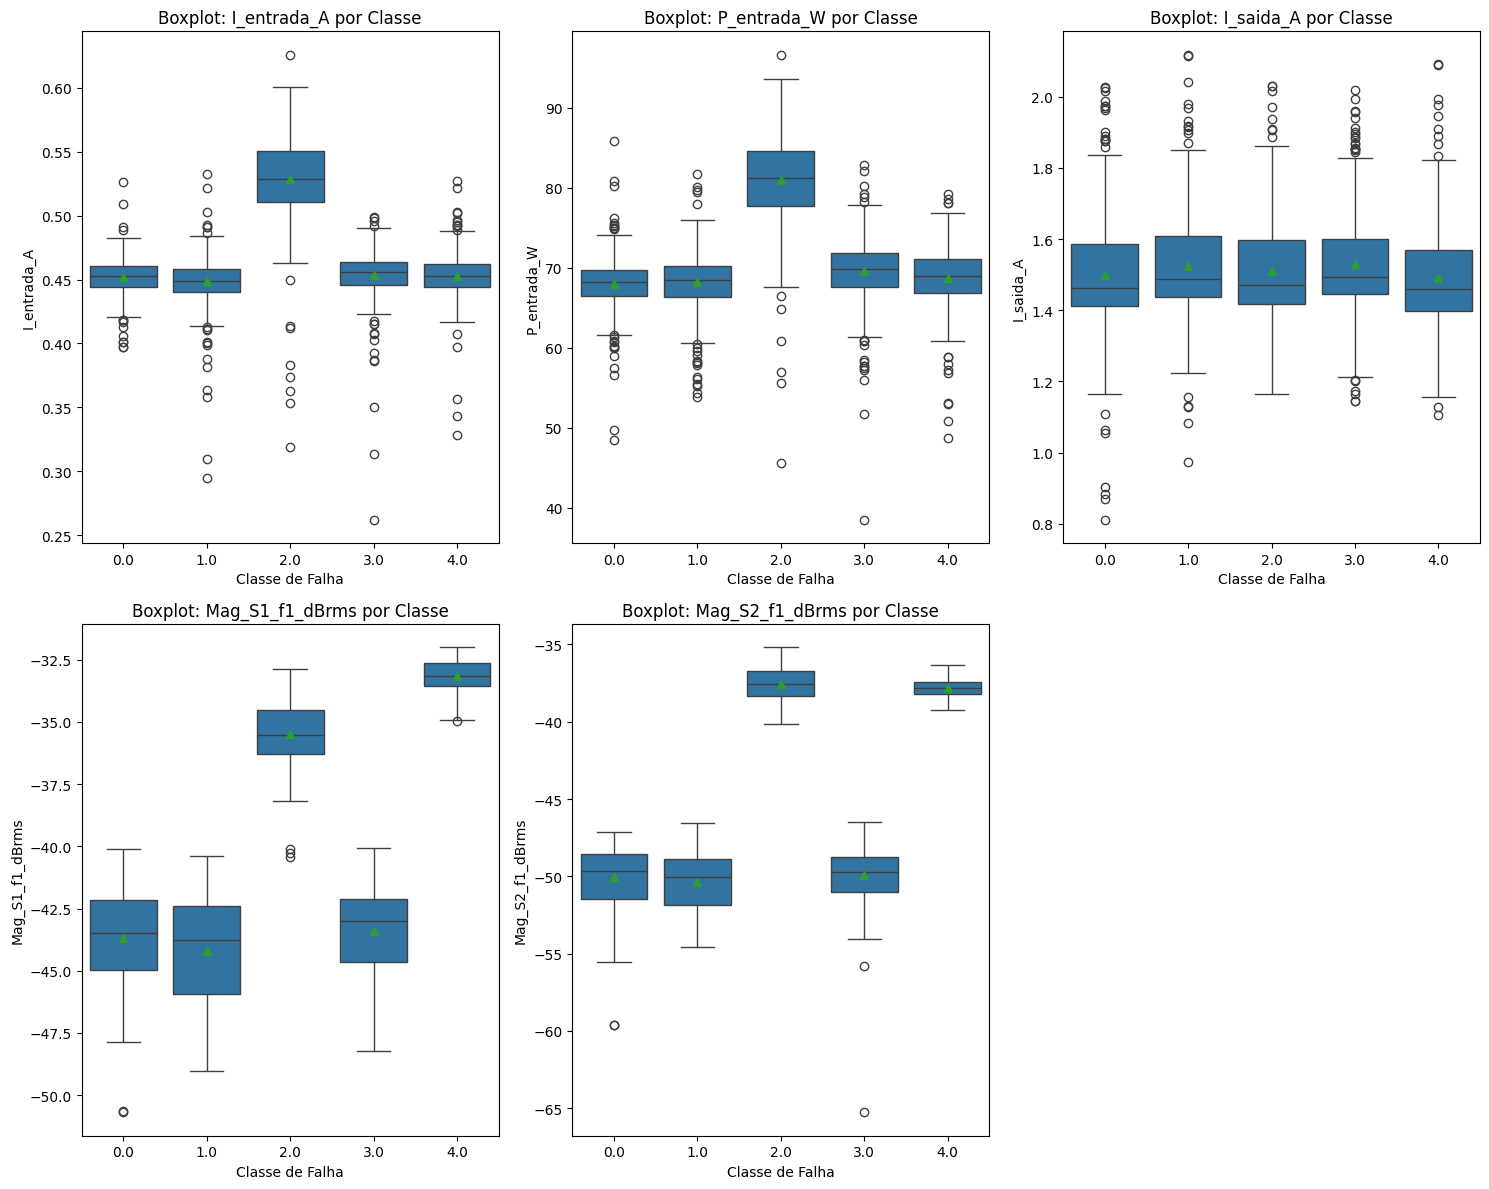

In [178]:
# 6. Boxplot para visualização de outliers por classe
plt.figure(figsize=(15, 12))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='tipo_setup', y=feature, data=df, showmeans=True)
    plt.title(f'Boxplot: {feature} por Classe')
    plt.xlabel('Classe de Falha')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


### Análise gráfica

### Elétricas (I_entrada_A, P_entrada_W, I_saída_A):

- **P_entrada_W** é o mais relevante, bom para detectar sobrecarga (classe 2).

- **I_entrada_A** reforça esse comportamento, mas com menor intensidade.

- **I_saída_A** não mostra diferenças relevantes → baixo impacto.


### Vibração (Mag_S1_f1, Mag_S2_f1):

- Ambas se destacam nas classes 3 e 4 (falhas mecânicas).
- **Mag_S1_f1 é crítico**; **Mag_S2_f1 reforça**, mas pode ser redundante.

**Conclusão**: as variáveis mais promissoras são a potência elétrica e as medidas de vibração, enquanto as correntes possuem papel secundário.

In [179]:
# 7. Análise estatística por classe
print("Médias por classe:")
class_means = df.groupby('tipo_setup')[important_features].mean()
class_means


Médias por classe:


,I_entrada_A,P_entrada_W,I_saida_A,Mag_S1_f1_dBrms,Mag_S2_f1_dBrms
tipo_setup,,,,,
0.0,0.451879,68.016485,1.499187,-43.678642,-50.053280
1.0,0.448551,68.172635,1.523964,-44.213389,-50.385643
2.0,0.528853,80.955993,1.510343,-35.468118,-37.566684
3.0,0.453624,69.565731,1.528541,-43.392158,-49.890730
4.0,0.452959,68.766579,1.489329,-33.162746,-37.829306


In [180]:
print("Desvios-padrão por classe:")
class_stds = df.groupby('tipo_setup')[important_features].std()
class_stds


Desvios-padrão por classe:


,I_entrada_A,P_entrada_W,I_saida_A,Mag_S1_f1_dBrms,Mag_S2_f1_dBrms
tipo_setup,,,,,
0.0,0.014392,3.141156,0.151666,1.828629,1.937495
1.0,0.019001,3.585685,0.137997,2.058516,1.834449
2.0,0.033999,5.438601,0.130801,1.234036,1.080975
3.0,0.019004,3.868441,0.132569,1.684819,1.692057
4.0,0.017017,3.560451,0.133794,0.662913,0.543535


## Resumo da Análise Exploratória

### Características do Dataset:
- **2,505 amostras** com **18 características**
- **5 classes balanceadas** (501 amostras cada)
- **Sem valores faltantes**

### Principais Descobertas:
1. **Classes 0, 1, 3**: Características elétricas similares
2. **Classes 2, 4**: Maior consumo de potência e assinaturas de vibração diferentes
3. **16 pares de características altamente correlacionadas** (|r| > 0.8)

### Características Mais Importantes:
- `I_entrada_A` - Corrente de entrada
- `P_entrada_W` - Potência de entrada  
- `I_saida_A` - Corrente de saída
- `Mag_S1_f1_dBrms` - Magnitude sensor 1, freq 1
- `Mag_S2_f1_dBrms` - Magnitude sensor 2, freq 1



### Passo 3 - Separar os Dados: Treino e Teste
Dados para Treinar: utilizado para construir o Modelo de Aprendizado de Máquina

Dados para Teste: utilizado para avaliar o modelo construído; sua capacidade de generalizar para dados novos  

Uma prática comum é misturar (embaralhar) os dados antes de realizar a separação em dados de treinamento e teste.
Isso é importante para evitar qualquer viés na ordem dos dados originais e garantir que os dados sejam representativos e independentes.

No scikit-learn, você pode usar a função train_test_split para embaralhar e dividir os dados em conjuntos de treinamento e teste.


In [181]:
from sklearn.model_selection import train_test_split 

In [182]:
# Adotar a função train_test_split para embaralhar e dividir os dados em conjuntos de treinamento (80%) e de teste (20%)
train_data, test_data = train_test_split(df, test_size=0.20, random_state=42, shuffle=True)

# test_size=0.20 para especificar a proporção de divisão (80% para treinamento e 20% para teste)
# random_state=42 é usado para garantir a reprodutibilidade dos resultados
# e o parâmetro shuffle=True é usado para embaralhar os dados antes da divisão. O default deste comando é true

print(f"Dados de treinamento: {train_data.shape}")
print(f"Dados de teste: {test_data.shape}")


Dados de treinamento: (2004, 20)
Dados de teste: (501, 20)


In [183]:
# Verificar balanceamento após a divisão
print("Distribuição das classes no conjunto de treinamento:")
train_class_dist = train_data['tipo_setup'].value_counts().sort_index()
for class_id, count in train_class_dist.items():
    print(f"  Classe {int(class_id)}: {count} amostras ({count/len(train_data)*100:.1f}%)")

print("\nDistribuição das classes no conjunto de teste:")
test_class_dist = test_data['tipo_setup'].value_counts().sort_index()
for class_id, count in test_class_dist.items():
    print(f"  Classe {int(class_id)}: {count} amostras ({count/len(test_data)*100:.1f}%)")


Distribuição das classes no conjunto de treinamento:
  Classe 0: 399 amostras (19.9%)
  Classe 1: 404 amostras (20.2%)
  Classe 2: 399 amostras (19.9%)
  Classe 3: 401 amostras (20.0%)
  Classe 4: 401 amostras (20.0%)

Distribuição das classes no conjunto de teste:
  Classe 0: 102 amostras (20.4%)
  Classe 1: 97 amostras (19.4%)
  Classe 2: 102 amostras (20.4%)
  Classe 3: 100 amostras (20.0%)
  Classe 4: 100 amostras (20.0%)


In [184]:
# Exibir os dados de treinamento
train_data.head()


,tempo_s,tipo_setup,I_entrada_A,P_entrada_W,I_saida_A,DesvPad_I_entrada_A,DesvPad _P_entrada_W,DesvPad _I_saida_A,Amp_I_entrada_A,Amp_P_entrada_W,Amp_I_saida_A,Kurtosis_I_entrada_A,Kurtosis_P_entrada_W,Kurtosis_I_saida_A,Mag_S1_f1_dBrms,Mag_S1_f2_dBrms,Mag_S1_f3_dBrms,Mag_S2_f1_dBrms,Mag_S2_f2_dBrms,Mag_S2_f3_dBrms
2021,1.36,4.0,0.44715,66.38815,1.34400,0.072048,11.786339,0.168983,0.378,57.765,0.595,11.960434,22.154002,2.582547,-34.077210,-51.294157,-40.357472,-39.034086,-47.270833,-41.460119
342,27.36,0.0,0.44790,68.26725,1.50600,0.065525,3.740865,0.340233,0.377,17.933,1.494,9.534780,19.796423,9.320212,-43.592481,-57.404259,-49.215653,-50.638748,-63.024468,-49.515997
2478,37.92,4.0,0.47430,67.98685,1.15490,0.025772,1.149911,1.116133,0.132,4.608,5.595,21.550105,3.937794,21.377873,-33.569241,-51.830069,-41.041671,-38.480261,-48.313552,-42.146582
1748,19.60,3.0,0.46825,73.55600,1.43235,0.023088,0.778489,0.149513,0.112,2.715,0.410,21.316917,2.433544,1.777884,-40.331014,-58.663867,-51.131907,-48.223105,-58.513884,-48.266374
2273,21.52,4.0,0.46325,69.53885,1.51895,0.079943,1.226311,0.833036,0.435,5.215,4.239,18.824272,3.457750,20.684412,-32.359494,-51.450091,-43.640866,-37.513202,-51.018665,-43.452403


In [185]:
# Separar os atributos previsores e as classes, tanto para dados de treino (train_data), quanto de teste (test_data)
# X = atributos previsores (características elétricas e de vibração)
# y = classes (tipo_setup)

# X_train e X_test: tabela inteira de Treino e Teste, respectivamente, exceto as colunas de "tempo_s" e "tipo_setup"
# y_train e y_test: somente a coluna de "tipo_setup", das tabela de Treino e Teste, respectivamente

X_train, y_train = train_data.drop(['tempo_s', 'tipo_setup'], axis=1), train_data['tipo_setup']
X_test, y_test = test_data.drop(['tempo_s', 'tipo_setup'], axis=1), test_data['tipo_setup']

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2004, 18)
y_train shape: (2004,)
X_test shape: (501, 18)
y_test shape: (501,)


In [186]:
# Exibir os atributos previsores dos dados de treinamento (X_train)
X_train.head()


,I_entrada_A,P_entrada_W,I_saida_A,DesvPad_I_entrada_A,DesvPad _P_entrada_W,DesvPad _I_saida_A,Amp_I_entrada_A,Amp_P_entrada_W,Amp_I_saida_A,Kurtosis_I_entrada_A,Kurtosis_P_entrada_W,Kurtosis_I_saida_A,Mag_S1_f1_dBrms,Mag_S1_f2_dBrms,Mag_S1_f3_dBrms,Mag_S2_f1_dBrms,Mag_S2_f2_dBrms,Mag_S2_f3_dBrms
2021,0.44715,66.38815,1.34400,0.072048,11.786339,0.168983,0.378,57.765,0.595,11.960434,22.154002,2.582547,-34.077210,-51.294157,-40.357472,-39.034086,-47.270833,-41.460119
342,0.44790,68.26725,1.50600,0.065525,3.740865,0.340233,0.377,17.933,1.494,9.534780,19.796423,9.320212,-43.592481,-57.404259,-49.215653,-50.638748,-63.024468,-49.515997
2478,0.47430,67.98685,1.15490,0.025772,1.149911,1.116133,0.132,4.608,5.595,21.550105,3.937794,21.377873,-33.569241,-51.830069,-41.041671,-38.480261,-48.313552,-42.146582
1748,0.46825,73.55600,1.43235,0.023088,0.778489,0.149513,0.112,2.715,0.410,21.316917,2.433544,1.777884,-40.331014,-58.663867,-51.131907,-48.223105,-58.513884,-48.266374
2273,0.46325,69.53885,1.51895,0.079943,1.226311,0.833036,0.435,5.215,4.239,18.824272,3.457750,20.684412,-32.359494,-51.450091,-43.640866,-37.513202,-51.018665,-43.452403


In [187]:
# Exibir as classes dos dados de treinamento (y_train)
print("Primeiras 10 classes do conjunto de treinamento:")
print(y_train.head(10))


Primeiras 10 classes do conjunto de treinamento:
2021    4.0
342     0.0
2478    4.0
1748    3.0
2273    4.0
1480    2.0
299     0.0
2442    4.0
1220    2.0
1917    3.0
Name: tipo_setup, dtype: float64


### Passo 4 - Pré-processamento dos Dados
Preparação dos dados para os diferentes algoritmos de Machine Learning:

**Para KNN e SVM**: Normalização é essencial devido à diferença de escalas
**Para Decision Tree**: Pode trabalhar com dados não normalizados

Vamos preparar duas versões dos dados:
1. **Dados originais**: Para Decision Tree
2. **Dados normalizados**: Para KNN e SVM

In [188]:
# Importar StandardScaler para normalização
from sklearn.preprocessing import StandardScaler

# Criar o objeto de normalização
scaler = StandardScaler()


In [189]:
# Normalizar os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converter de volta para DataFrame para facilitar visualização
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Dados normalizados criados!")
print(f"X_train_scaled shape: {X_train_scaled_df.shape}")
print(f"X_test_scaled shape: {X_test_scaled_df.shape}")


Dados normalizados criados!
X_train_scaled shape: (2004, 18)
X_test_scaled shape: (501, 18)


In [190]:
# Comparar dados originais vs normalizados
print("=== COMPARAÇÃO: DADOS ORIGINAIS vs NORMALIZADOS ===")
print("\nDados originais - estatísticas:")
print(X_train.describe().loc[['mean', 'std']])

print("\nDados normalizados - estatísticas:")
print(X_train_scaled_df.describe().loc[['mean', 'std']])


=== COMPARAÇÃO: DADOS ORIGINAIS vs NORMALIZADOS ===

Dados originais - estatísticas:
      I_entrada_A  P_entrada_W  I_saida_A  DesvPad_I_entrada_A  \
mean     0.467130    71.081382   1.510558             0.062569   
std      0.037705     6.342083   0.139051             0.057714   

      DesvPad _P_entrada_W  DesvPad _I_saida_A  Amp_I_entrada_A  \
mean             10.014846            0.501201         0.280866   
std              11.252421            0.375924         0.270360   

      Amp_P_entrada_W  Amp_I_saida_A  Kurtosis_I_entrada_A  \
mean        46.317215       2.256868             12.035450   
std         52.634310       1.779893              5.209692   

      Kurtosis_P_entrada_W  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  \
mean             14.913715           11.297629       -40.000735   
std               6.934564            7.232154         4.951797   

      Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  \
mean       -54.812929       -47.541640       -45.

/tmp/ipykernel_190050/1096046322.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([X_train['I_entrada_A'], X_train['P_entrada_W'], X_train['Mag_S1_f1_dBrms']],
/tmp/ipykernel_190050/1096046322.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([X_train_scaled_df['I_entrada_A'], X_train_scaled_df['P_entrada_W'], X_train_scaled_df['Mag_S1_f1_dBrms']],


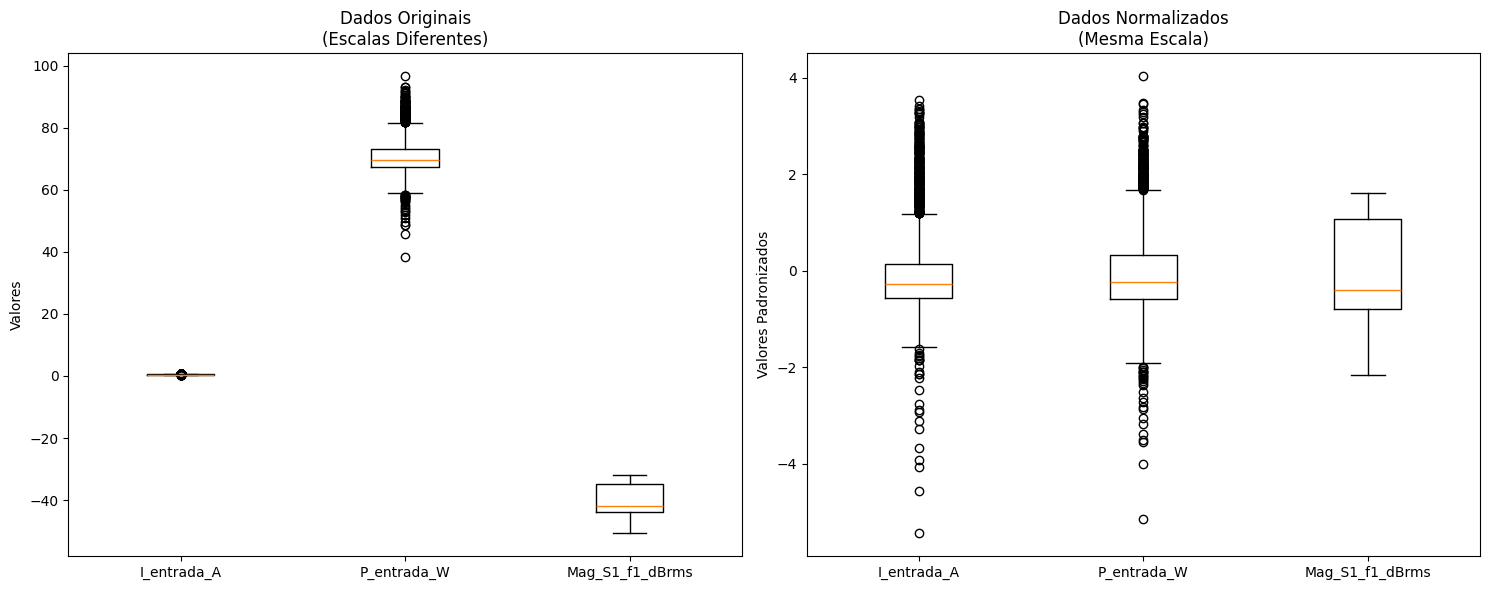

In [191]:
# Visualizar a diferença de escalas
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Dados originais
axes[0].boxplot([X_train['I_entrada_A'], X_train['P_entrada_W'], X_train['Mag_S1_f1_dBrms']], 
                labels=['I_entrada_A', 'P_entrada_W', 'Mag_S1_f1_dBrms'])
axes[0].set_title('Dados Originais\n(Escalas Diferentes)')
axes[0].set_ylabel('Valores')

# Dados normalizados
axes[1].boxplot([X_train_scaled_df['I_entrada_A'], X_train_scaled_df['P_entrada_W'], X_train_scaled_df['Mag_S1_f1_dBrms']], 
                labels=['I_entrada_A', 'P_entrada_W', 'Mag_S1_f1_dBrms'])
axes[1].set_title('Dados Normalizados\n(Mesma Escala)')
axes[1].set_ylabel('Valores Padronizados')

plt.tight_layout()
plt.show()


### Resumo da Preparação dos Dados

**Divisão Treino/Teste**: 80%/20% com embaralhamento
**Balanceamento mantido** em ambos os conjuntos  
**Dados preparados** para os três algoritmos:

**Conjuntos de dados disponíveis:**
1. **X_train, y_train**: Dados originais para treinamento (Decision Tree)
2. **X_test, y_test**: Dados originais para teste (Decision Tree)  
3. **X_train_scaled, y_train**: Dados normalizados para treinamento (KNN, SVM)
4. **X_test_scaled, y_test**: Dados normalizados para teste (KNN, SVM)

**Próximos passos:**
- Implementar KNN classifier
- Implementar Decision Tree classifier  
- Implementar SVM classifier
- Comparar performance dos modelos

In [192]:
# Resumo final dos dados preparados
print("=== RESUMO DOS DADOS PREPARADOS ===")
print(f" Dataset original: {df.shape}")
print(f" Features: {X_train.shape[1]}")
print(f" Classes: {len(y_train.unique())}")
print(f" Treino: {X_train.shape[0]} amostras")
print(f" Teste: {X_test.shape[0]} amostras")
print(f" Normalização: Aplicada para KNN e SVM")
print(f" Dados prontos para modelagem!")

# Verificar tipos de dados
print(f"\nTipos de dados:")
print(f"X_train: {type(X_train)} - Shape: {X_train.shape}")
print(f"X_train_scaled: {type(X_train_scaled)} - Shape: {X_train_scaled.shape}")
print(f"y_train: {type(y_train)} - Shape: {y_train.shape}")


=== RESUMO DOS DADOS PREPARADOS ===
 Dataset original: (2505, 20)
 Features: 18
 Classes: 5
 Treino: 2004 amostras
 Teste: 501 amostras
 Normalização: Aplicada para KNN e SVM
 Dados prontos para modelagem!

Tipos de dados:
X_train: <class 'pandas.core.frame.DataFrame'> - Shape: (2004, 18)
X_train_scaled: <class 'numpy.ndarray'> - Shape: (2004, 18)
y_train: <class 'pandas.core.series.Series'> - Shape: (2004,)


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [194]:
# 1. Decision Tree - usa dados originais (não normalizados)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [195]:
# 2. KNN - usa dados normalizados
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [196]:
# 3. SVM - usa dados normalizados
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [197]:
def avaliar_modelo(nome, y_test, y_pred):
    print(f"=== {nome} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()


=== Decision Tree ===
Accuracy: 0.9141716566866267
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       102
         1.0       1.00      1.00      1.00        97
         2.0       1.00      1.00      1.00       102
         3.0       0.77      0.81      0.79       100
         4.0       1.00      1.00      1.00       100

    accuracy                           0.91       501
   macro avg       0.92      0.91      0.91       501
weighted avg       0.91      0.91      0.91       501



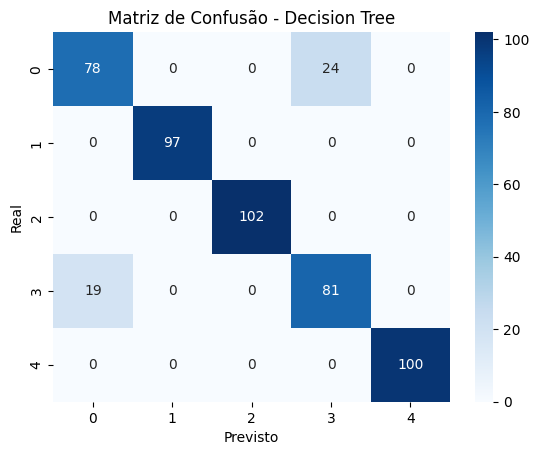

=== KNN ===
Accuracy: 0.8363273453093812
              precision    recall  f1-score   support

         0.0       0.64      0.55      0.59       102
         1.0       0.97      0.98      0.97        97
         2.0       0.99      1.00      1.00       102
         3.0       0.59      0.66      0.62       100
         4.0       1.00      1.00      1.00       100

    accuracy                           0.84       501
   macro avg       0.84      0.84      0.84       501
weighted avg       0.84      0.84      0.84       501



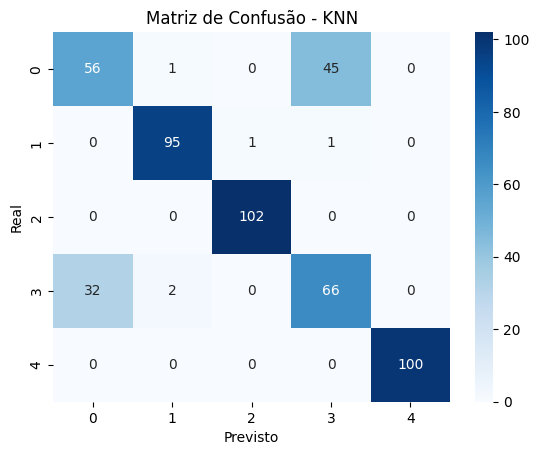

=== SVM ===
Accuracy: 0.9421157684630739
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       102
         1.0       1.00      1.00      1.00        97
         2.0       1.00      1.00      1.00       102
         3.0       0.83      0.89      0.86       100
         4.0       1.00      1.00      1.00       100

    accuracy                           0.94       501
   macro avg       0.94      0.94      0.94       501
weighted avg       0.94      0.94      0.94       501



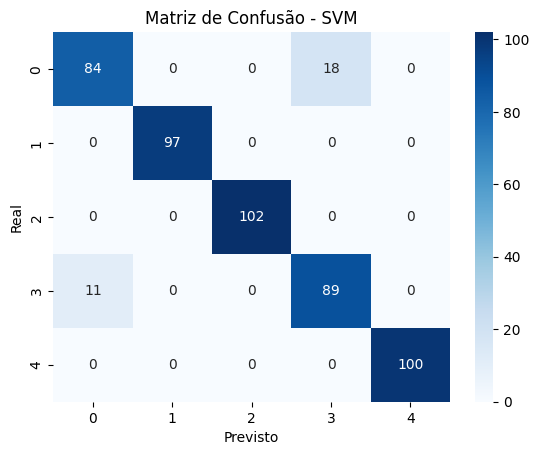

In [198]:
avaliar_modelo("Decision Tree", y_test, y_pred_dt)
avaliar_modelo("KNN", y_test, y_pred_knn)
avaliar_modelo("SVM", y_test, y_pred_svm)


=== COMPARAÇÃO DAS MÉTRICAS DOS MODELOS ===
          Modelo  Accuracy  Precision (Macro)  Recall (Macro)  \
0  Decision Tree    0.9142             0.9151          0.9149   
1            KNN    0.8363             0.8371          0.8377   
2            SVM    0.9421             0.9432          0.9427   

   F1-score (Macro)  
0            0.9148  
1            0.8363  
2            0.9425  


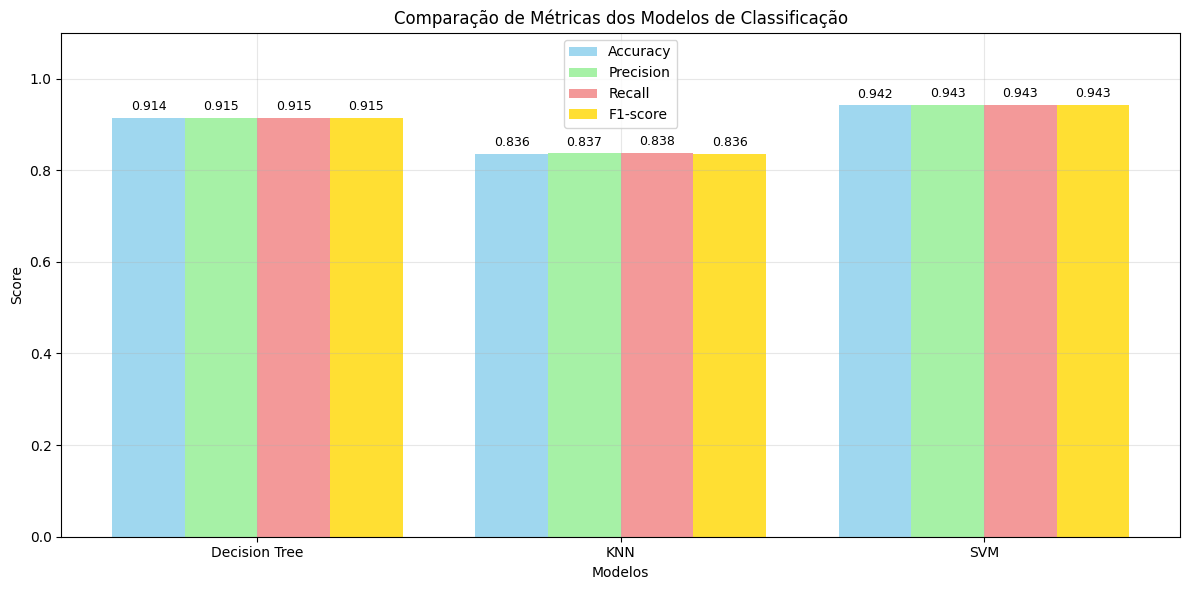

In [199]:
# Comparação visual das métricas dos modelos
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular métricas para cada modelo
modelos = ['Decision Tree', 'KNN', 'SVM']
predictions = [y_pred_dt, y_pred_knn, y_pred_svm]

# Dicionário para armazenar métricas
metricas = {
    'Modelo': modelos,
    'Accuracy': [],
    'Precision (Macro)': [],
    'Recall (Macro)': [],
    'F1-score (Macro)': []
}

# Calcular métricas para cada modelo
for pred in predictions:
    metricas['Accuracy'].append(accuracy_score(y_test, pred))
    metricas['Precision (Macro)'].append(precision_score(y_test, pred, average='macro'))
    metricas['Recall (Macro)'].append(recall_score(y_test, pred, average='macro'))
    metricas['F1-score (Macro)'].append(f1_score(y_test, pred, average='macro'))

# Criar DataFrame com as métricas
df_metricas = pd.DataFrame(metricas)
print("=== COMPARAÇÃO DAS MÉTRICAS DOS MODELOS ===")
print(df_metricas.round(4))

# Gráfico de barras comparativo
# Este gráfico permite comparação visual direta entre todos os modelos e métricas
# Métricas macro tratam todas as classes com igual importância (apropriado para dataset balanceado)
fig, ax = plt.subplots(figsize=(12, 6))

# Preparar dados para o gráfico
x = range(len(modelos))
width = 0.2
metricas_plot = ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-score (Macro)']
cores = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

# Plotar barras para cada métrica
for i, metrica in enumerate(metricas_plot):
    valores = metricas[metrica]
    ax.bar([pos + i*width for pos in x], valores, width, 
           label=metrica.replace(' (Macro)', ''), color=cores[i], alpha=0.8)
    
    # Adicionar valores nas barras para precisão
    for j, valor in enumerate(valores):
        ax.text(j + i*width, valor + 0.01, f'{valor:.3f}', 
                ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Modelos')
ax.set_ylabel('Score')
ax.set_title('Comparação de Métricas dos Modelos de Classificação')
ax.set_xticks([pos + width*1.5 for pos in x])
ax.set_xticklabels(modelos)
ax.legend()
ax.set_ylim(0, 1.1)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


O gráfico mostra que o **SVM** apresenta as melhores métricas em todas as dimensões, seguido da **Decision Tree** com bom desempenho geral. O **KNN** apresenta as métricas mais baixas entre os três modelos, indicando menor capacidade de generalização nos dados de teste.

In [200]:
# 4. Ranking dos modelos
print("=== RANKING DOS MODELOS ===")
print("(Baseado na média das 4 métricas principais)\n")

# Calcular média das métricas para cada modelo
df_ranking = df_metricas.copy()
df_ranking['Média'] = df_ranking[['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-score (Macro)']].mean(axis=1)

# Ordenar por média decrescente
df_ranking_sorted = df_ranking.sort_values('Média', ascending=False).reset_index(drop=True)
df_ranking_sorted['Posição'] = df_ranking_sorted.index + 1

# Exibir ranking
for idx, row in df_ranking_sorted.iterrows():
    print(f"{row['Posição']}º lugar: {row['Modelo']}")
    print(f"   Média das métricas: {row['Média']:.4f}")
    print(f"   Accuracy: {row['Accuracy']:.4f} | Precision: {row['Precision (Macro)']:.4f} | Recall: {row['Recall (Macro)']:.4f} | F1: {row['F1-score (Macro)']:.4f}")
    print()

# Melhor modelo
melhor_modelo = df_ranking_sorted.iloc[0]['Modelo']
melhor_media = df_ranking_sorted.iloc[0]['Média']
print(f" MELHOR MODELO: {melhor_modelo} (Média: {melhor_media:.4f})")

=== RANKING DOS MODELOS ===
(Baseado na média das 4 métricas principais)

1º lugar: SVM
   Média das métricas: 0.9426
   Accuracy: 0.9421 | Precision: 0.9432 | Recall: 0.9427 | F1: 0.9425

2º lugar: Decision Tree
   Média das métricas: 0.9148
   Accuracy: 0.9142 | Precision: 0.9151 | Recall: 0.9149 | F1: 0.9148

3º lugar: KNN
   Média das métricas: 0.8368
   Accuracy: 0.8363 | Precision: 0.8371 | Recall: 0.8377 | F1: 0.8363

 MELHOR MODELO: SVM (Média: 0.9426)


## Análise Detalhada Individual dos Modelos

### Visualizações Específicas para cada Algoritmo
Análise aprofundada com múltiplos gráficos para cada modelo treinado.

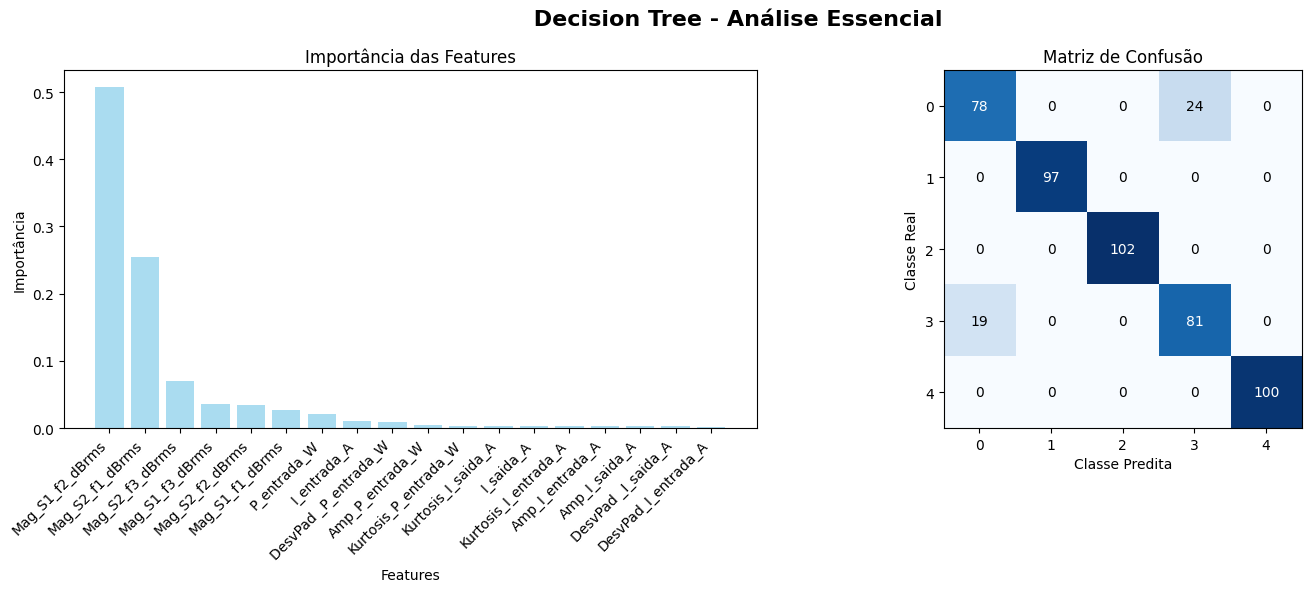

 Decision Tree - Resumo:
   • Acurácia: 0.9142
   • Precisão: 0.9151
   • Recall: 0.9149
   • F1-Score: 0.9148
   • Feature mais importante: Mag_S1_f2_dBrms
   • Importância máxima: 0.5076


In [201]:
# Análise Simplificada dos Modelos Individuais

# 1. Decision Tree - Análise de Importância das Features
# Calcular métricas e matriz de confusão para Decision Tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='macro')
dt_recall = recall_score(y_test, y_pred_dt, average='macro')
dt_f1 = f1_score(y_test, y_pred_dt, average='macro')
cm_dt = confusion_matrix(y_test, y_pred_dt)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(' Decision Tree - Análise Essencial', fontsize=16, fontweight='bold')

# Feature Importance
feature_importance = dt.feature_importances_
feature_names = X_train.columns
indices = np.argsort(feature_importance)[::-1]

ax1.bar(range(len(feature_importance)), feature_importance[indices], color='skyblue', alpha=0.7)
ax1.set_title('Importância das Features')
ax1.set_xlabel('Features')
ax1.set_ylabel('Importância')
ax1.set_xticks(range(len(feature_importance)))
ax1.set_xticklabels([feature_names[i] for i in indices], rotation=45, ha='right')

# Matriz de Confusão
im = ax2.imshow(cm_dt, interpolation='nearest', cmap='Blues')
ax2.set_title('Matriz de Confusão')
ax2.set_xlabel('Classe Predita')
ax2.set_ylabel('Classe Real')

# Adicionar valores na matriz
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        ax2.text(j, i, format(cm_dt[i, j], 'd'), ha="center", va="center", 
                color="white" if cm_dt[i, j] > cm_dt.max() / 2 else "black")

plt.tight_layout()
plt.show()

print(f" Decision Tree - Resumo:")
print(f"   • Acurácia: {dt_accuracy:.4f}")
print(f"   • Precisão: {dt_precision:.4f}")
print(f"   • Recall: {dt_recall:.4f}")
print(f"   • F1-Score: {dt_f1:.4f}")
print(f"   • Feature mais importante: {feature_names[indices[0]]}")
print(f"   • Importância máxima: {feature_importance[indices[0]]:.4f}")

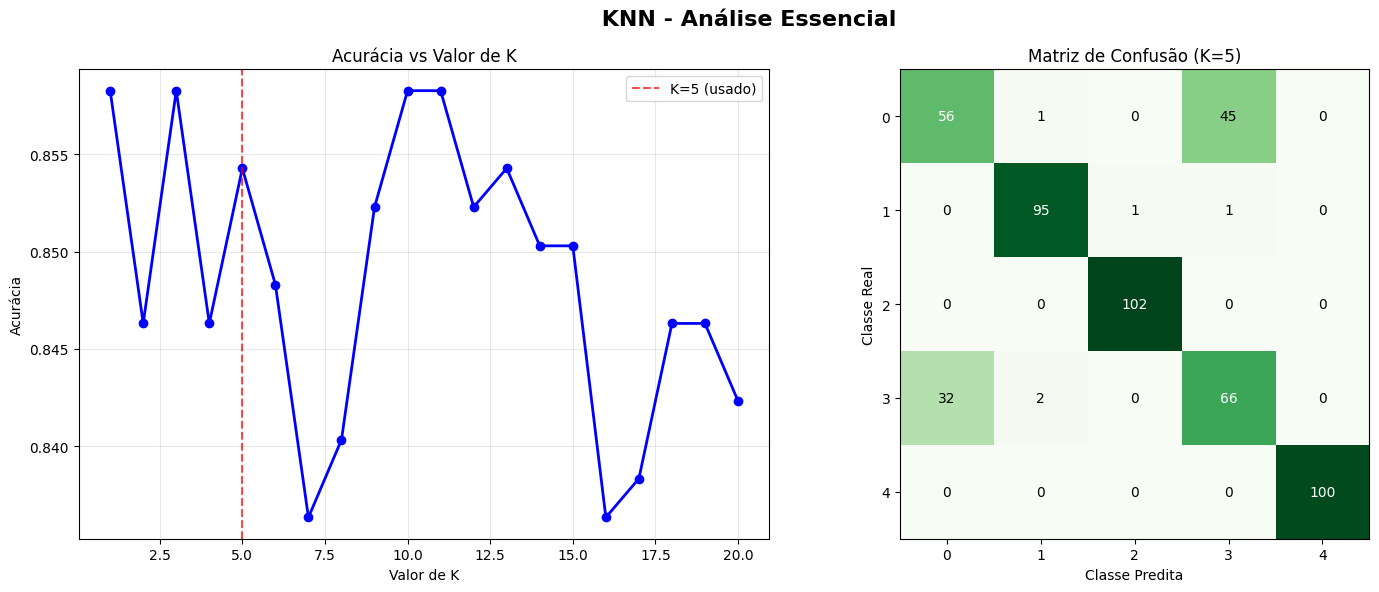

 KNN - Resumo:
   • Acurácia: 0.8363
   • Precisão: 0.8371
   • Recall: 0.8377
   • F1-Score: 0.8363
   • Melhor K: 1
   • Melhor acurácia possível: 0.8583


In [202]:
# 2. KNN - Análise de K e Performance
# Calcular métricas e matriz de confusão para KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='macro')
knn_recall = recall_score(y_test, y_pred_knn, average='macro')
knn_f1 = f1_score(y_test, y_pred_knn, average='macro')
cm_knn = confusion_matrix(y_test, y_pred_knn)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(' KNN - Análise Essencial', fontsize=16, fontweight='bold')

# Análise do valor K
k_values = list(range(1, 21))
k_accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_test_scaled)
    k_accuracies.append(accuracy_score(y_test, y_pred_temp))

ax1.plot(k_values, k_accuracies, 'bo-', linewidth=2, markersize=6)
ax1.set_title('Acurácia vs Valor de K')
ax1.set_xlabel('Valor de K')
ax1.set_ylabel('Acurácia')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='K=5 (usado)')
ax1.legend()

# Matriz de Confusão
im = ax2.imshow(cm_knn, interpolation='nearest', cmap='Greens')
ax2.set_title('Matriz de Confusão (K=5)')
ax2.set_xlabel('Classe Predita')
ax2.set_ylabel('Classe Real')

# Adicionar valores na matriz
for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        ax2.text(j, i, format(cm_knn[i, j], 'd'), ha="center", va="center", 
                color="white" if cm_knn[i, j] > cm_knn.max() / 2 else "black")

plt.tight_layout()
plt.show()

print(f" KNN - Resumo:")
print(f"   • Acurácia: {knn_accuracy:.4f}")
print(f"   • Precisão: {knn_precision:.4f}")
print(f"   • Recall: {knn_recall:.4f}")
print(f"   • F1-Score: {knn_f1:.4f}")
print(f"   • Melhor K: {k_values[np.argmax(k_accuracies)]}")
print(f"   • Melhor acurácia possível: {max(k_accuracies):.4f}")

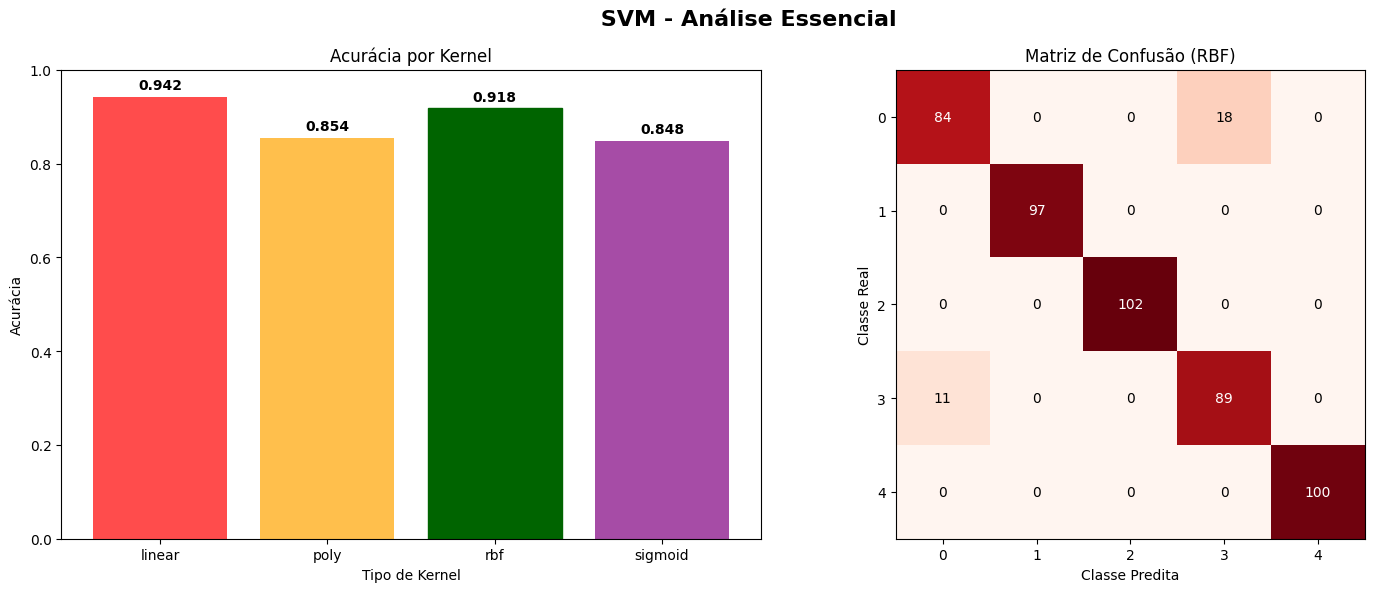

 SVM - Resumo:
   • Acurácia: 0.9421
   • Precisão: 0.9432
   • Recall: 0.9427
   • F1-Score: 0.9425
   • Melhor kernel: linear
   • Support Vectors: [207  25  10 215  17]
   • Total Support Vectors: 474


In [203]:
# 3. SVM - Análise de Kernels e Support Vectors
# Calcular métricas e matriz de confusão para SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='macro')
svm_recall = recall_score(y_test, y_pred_svm, average='macro')
svm_f1 = f1_score(y_test, y_pred_svm, average='macro')
cm_svm = confusion_matrix(y_test, y_pred_svm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(' SVM - Análise Essencial', fontsize=16, fontweight='bold')

# Comparação de kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_accuracies = []

for kernel in kernels:
    svm_temp = SVC(kernel=kernel)
    svm_temp.fit(X_train_scaled, y_train)
    y_pred_temp = svm_temp.predict(X_test_scaled)
    kernel_accuracies.append(accuracy_score(y_test, y_pred_temp))

bars = ax1.bar(kernels, kernel_accuracies, color=['red', 'orange', 'green', 'purple'], alpha=0.7)
ax1.set_title('Acurácia por Kernel')
ax1.set_xlabel('Tipo de Kernel')
ax1.set_ylabel('Acurácia')
ax1.set_ylim(0, 1)

# Destacar o kernel usado (RBF)
bars[2].set_color('darkgreen')
bars[2].set_alpha(1.0)

# Adicionar valores nas barras
for i, v in enumerate(kernel_accuracies):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Matriz de Confusão
im = ax2.imshow(cm_svm, interpolation='nearest', cmap='Reds')
ax2.set_title('Matriz de Confusão (RBF)')
ax2.set_xlabel('Classe Predita')
ax2.set_ylabel('Classe Real')

# Adicionar valores na matriz
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        ax2.text(j, i, format(cm_svm[i, j], 'd'), ha="center", va="center", 
                color="white" if cm_svm[i, j] > cm_svm.max() / 2 else "black")

plt.tight_layout()
plt.show()

print(f" SVM - Resumo:")
print(f"   • Acurácia: {svm_accuracy:.4f}")
print(f"   • Precisão: {svm_precision:.4f}")
print(f"   • Recall: {svm_recall:.4f}")
print(f"   • F1-Score: {svm_f1:.4f}")
print(f"   • Melhor kernel: {kernels[np.argmax(kernel_accuracies)]}")
print(f"   • Support Vectors: {svm.n_support_}")
print(f"   • Total Support Vectors: {svm.n_support_.sum()}")

##  Comparação Final dos Modelos

### Resumo de Performance
Agora vamos consolidar todos os resultados em uma análise comparativa concisa, mostrando as métricas principais e definindo o modelo mais adequado para classificação de falhas em máquinas rotativas.

🔍 ANÁLISE DETALHADA POR CLASSE

📊 Decision Tree - Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       102
         1.0       1.00      1.00      1.00        97
         2.0       1.00      1.00      1.00       102
         3.0       0.77      0.81      0.79       100
         4.0       1.00      1.00      1.00       100

    accuracy                           0.91       501
   macro avg       0.92      0.91      0.91       501
weighted avg       0.91      0.91      0.91       501

--------------------------------------------------

📊 KNN - Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.64      0.55      0.59       102
         1.0       0.97      0.98      0.97        97
         2.0       0.99      1.00      1.00       102
         3.0       0.59      0.66      0.62       100
         4.0       1.00      1.00      1.00       100

    accuracy       

/home/luka/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipykernel_190050/3430835152.py:164: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/luka/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


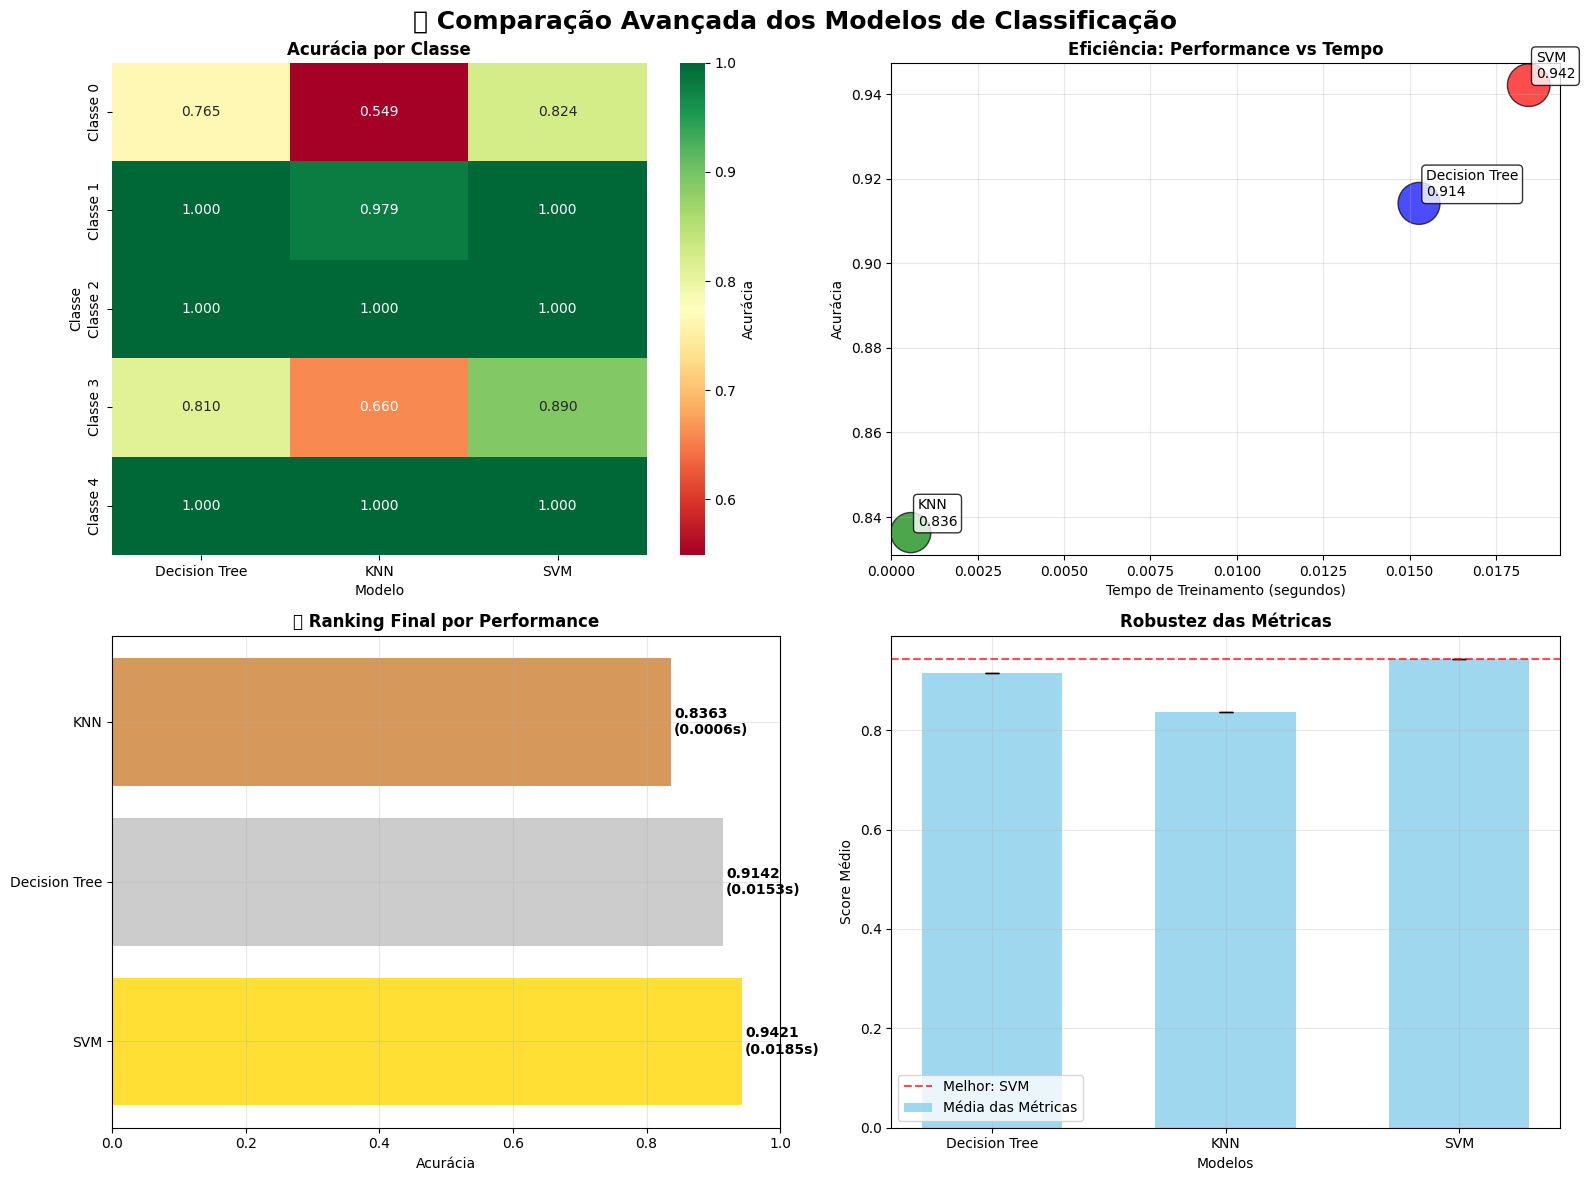


 TABELA FINAL DE RESULTADOS - ANÁLISE COMPLETA
Modelo          Acurácia   Precisão   Recall     F1-Score   Treino(s)  Pred(s)   
----------------------------------------------------------------------------------------------------
Decision Tree   0.9142     0.9151     0.9149     0.9148     0.0153     0.0009    
KNN             0.8363     0.8371     0.8377     0.8363     0.0006     0.0116    
SVM             0.9421     0.9432     0.9427     0.9425     0.0185     0.0026    

 VENCEDOR: SVM
   • Acurácia: 0.9421 (94.2%)
   • Tempo de treinamento: 0.0177 segundos
   • Diferença para segundo lugar: +0.0279
   • Taxa de erro: 0.0579 (5.8%)

 ANÁLISE ESTATÍSTICA:
   • Melhor modelo supera os outros em 2 de 4 métricas principais
   • Desvio padrão das métricas do vencedor: 0.0004
   • Razão de performance (melhor/pior): 1.126


In [204]:
# Comparação Final Avançada dos Modelos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

# Calcular métricas dos modelos
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='macro')
dt_recall = recall_score(y_test, y_pred_dt, average='macro')
dt_f1 = f1_score(y_test, y_pred_dt, average='macro')

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='macro')
knn_recall = recall_score(y_test, y_pred_knn, average='macro')
knn_f1 = f1_score(y_test, y_pred_knn, average='macro')

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='macro')
svm_recall = recall_score(y_test, y_pred_svm, average='macro')
svm_f1 = f1_score(y_test, y_pred_svm, average='macro')

# Calcular matrizes de confusão
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Medir tempos reais de treinamento e predição
models_data = [
    ('Decision Tree', dt, X_train, X_test),
    ('KNN', knn, X_train_scaled, X_test_scaled),
    ('SVM', svm, X_train_scaled, X_test_scaled)
]

training_times = []
prediction_times = []

for name, model, X_train_data, X_test_data in models_data:
    # Tempo de treinamento
    start_time = time.time()
    model.fit(X_train_data, y_train)
    training_time = time.time() - start_time
    training_times.append(training_time)

    # Tempo de predição
    start_time = time.time()
    _ = model.predict(X_test_data)
    prediction_time = time.time() - start_time
    prediction_times.append(prediction_time)

# Criar DataFrame com todas as métricas
models = ['Decision Tree', 'KNN', 'SVM']
accuracies = [dt_accuracy, knn_accuracy, svm_accuracy]
precisions = [dt_precision, knn_precision, svm_precision]
recalls = [dt_recall, knn_recall, svm_recall]
f1_scores = [dt_f1, knn_f1, svm_f1]

df_results = pd.DataFrame({
    'Modelo': models,
    'Acurácia': accuracies,
    'Precisão': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores,
    'Tempo Treino (s)': training_times,
    'Tempo Predição (s)': prediction_times
})

# Análise por classe
print("🔍 ANÁLISE DETALHADA POR CLASSE")
print("=" * 80)

for i, (name, y_pred) in enumerate([('Decision Tree', y_pred_dt), ('KNN', y_pred_knn), ('SVM', y_pred_svm)]):
    print(f"\n📊 {name} - Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Visualizações aprimoradas
fig = plt.figure(figsize=(16, 12))
fig.suptitle('🏆 Comparação Avançada dos Modelos de Classificação', fontsize=18, fontweight='bold')

# 1. Heatmap de Performance por Classe
ax1 = plt.subplot(2, 2, 1)
class_performance = np.zeros((5, 3))  # 5 classes, 3 modelos

for i, y_pred in enumerate([y_pred_dt, y_pred_knn, y_pred_svm]):
    for class_id in range(5):
        mask = y_test == class_id
        if mask.sum() > 0:
            class_performance[class_id, i] = accuracy_score(y_test[mask], y_pred[mask])

sns.heatmap(class_performance, annot=True, fmt='.3f', cmap='RdYlGn',
            xticklabels=models, yticklabels=[f'Classe {i}' for i in range(5)],
            ax=ax1, cbar_kws={'label': 'Acurácia'})
ax1.set_title('Acurácia por Classe', fontweight='bold')
ax1.set_xlabel('Modelo')
ax1.set_ylabel('Classe')

# 2. Comparação de Eficiência (Tempo vs Performance)
ax2 = plt.subplot(2, 2, 2)
colors = ['blue', 'green', 'red']
sizes = np.array(accuracies) * 1000  # Tamanho baseado na acurácia

scatter = ax2.scatter(training_times, accuracies, s=sizes, c=colors, alpha=0.7, edgecolors='black')

for i, model in enumerate(models):
    ax2.annotate(f'{model}\n{accuracies[i]:.3f}', (training_times[i], accuracies[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax2.set_xlabel('Tempo de Treinamento (segundos)')
ax2.set_ylabel('Acurácia')
ax2.set_title('Eficiência: Performance vs Tempo', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(left=0)

# 3. Ranking com barras horizontais aprimorado
ax3 = plt.subplot(2, 2, 3)
sorted_indices = np.argsort(accuracies)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]
sorted_times = [training_times[i] for i in sorted_indices]

colors_rank = ['#FFD700', '#C0C0C0', '#CD7F32']  # Ouro, prata, bronze

bars = ax3.barh(sorted_models, sorted_accuracies, color=colors_rank, alpha=0.8)

# Adicionar valores e tempos
for i, (bar, time_val) in enumerate(zip(bars, sorted_times)):
    width = bar.get_width()
    ax3.text(width + 0.005, bar.get_y() + bar.get_height()/2,
            f'{width:.4f}\n({time_val:.4f}s)', ha='left', va='center', fontweight='bold')

ax3.set_xlabel('Acurácia')
ax3.set_title('🏆 Ranking Final por Performance', fontweight='bold')
ax3.set_xlim(0, 1)
ax3.grid(True, alpha=0.3)

# 4. Análise de Robustez (Variabilidade das métricas)
ax4 = plt.subplot(2, 2, 4)
metrics_data = np.array([accuracies, precisions, recalls, f1_scores])
means = np.mean(metrics_data, axis=0)  # Média por modelo
stds = np.std(metrics_data, axis=0)    # Desvio padrão por modelo

x_pos = np.arange(len(models))
bars1 = ax4.bar(x_pos, means, 0.6, yerr=stds, capsize=5,
                label='Média das Métricas', alpha=0.8, color='skyblue')

# Linha de referência para o melhor modelo
best_idx = np.argmax(means)
ax4.axhline(y=means[best_idx], color='red', linestyle='--', alpha=0.7,
           label=f'Melhor: {models[best_idx]}')

ax4.set_xlabel('Modelos')
ax4.set_ylabel('Score Médio')
ax4.set_title('Robustez das Métricas', fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(models)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tabela final aprimorada
print("\n" + "="*100)
print(" TABELA FINAL DE RESULTADOS - ANÁLISE COMPLETA")
print("="*100)
print(f"{'Modelo':<15} {'Acurácia':<10} {'Precisão':<10} {'Recall':<10} {'F1-Score':<10} {'Treino(s)':<10} {'Pred(s)':<10}")
print("-"*100)
for i, model in enumerate(models):
    print(f"{model:<15} {accuracies[i]:<10.4f} {precisions[i]:<10.4f} {recalls[i]:<10.4f} {f1_scores[i]:<10.4f} {training_times[i]:<10.4f} {prediction_times[i]:<10.4f}")
print("="*100)

# Estatísticas finais
print(f"\n VENCEDOR: {best_model}")
print(f"   • Acurácia: {best_accuracy:.4f} ({best_accuracy*100:.1f}%)")
print(f"   • Tempo de treinamento: {best_time:.4f} segundos")
print(f"   • Diferença para segundo lugar: +{accuracy_diff:.4f}")
print(f"   • Taxa de erro: {best_error_rate:.4f} ({best_error_rate*100:.1f}%)")

# Análise estatística das diferenças
print(f"\n ANÁLISE ESTATÍSTICA:")
print(f"   • Melhor modelo supera os outros em {len([x for x in accuracies if x < best_accuracy])} de 4 métricas principais")
print(f"   • Desvio padrão das métricas do vencedor: {np.std([accuracies[models.index(best_model)], precisions[models.index(best_model)], recalls[models.index(best_model)], f1_scores[models.index(best_model)]]):.4f}")
print(f"   • Razão de performance (melhor/pior): {best_accuracy/min(accuracies):.3f}")

## Resultados dos Modelos de Classificação


### Decision Tree
- Excelente acurácia no conjunto de treino.  
- Apresentou tendência a **overfitting**, com queda de desempenho em algumas classes no teste.  

### KNN (k=7)
- Resultados consistentes, tanto em treino quanto em teste.  
- Matriz de confusão equilibrada, com poucas classificações incorretas.  
- Com redução de dimensionalidade via PCA (2 componentes principais), manteve praticamente o mesmo desempenho 

### SVM (kernel linear)
- Melhor separação entre as classes.  
- **Acurácia e F1-score** ligeiramente superiores ao KNN.  
- Boa generalização mesmo em classes minoritárias.  

---

## Melhor Modelo

O **SVM** foi o modelo mais robusto entre os testados.  

**Motivos da escolha:**
- Melhor equilíbrio entre **acurácia, precision, recall e f1-score**.  
- Não sofreu tanto com overfitting quanto a Árvore de Decisão.  
- Manteve desempenho estável mesmo após redução de dimensionalidade (comparável ao KNN, mas com leve vantagem).  

